# CUSTOMER CHURN PREDICTION MODEL FOR TELCO COMPANY #

# TABLE OF CONTENT
1. Bussiness Process Understanding
2. Model Workflow

    a. Data Collection and Data Understanding

    b. Data Splitting 

    c. Exploratory Data Analysis (EDA)

    d. Feature Engeenering 

    e. Modeling and Evaluation

    f. Model Constraint

3. Conclussion and Recommendation
4. Deployment

    


## 1. BUSSINESS PROCESS UNDERTANDING ##

**Business Understanding**

📌 **Background:**
Telco Company menghadapi tantangan dalam mempertahankan pelanggan akibat tingginya angka *customer churn*, yang berdampak langsung pada penurunan pendapatan dan peningkatan biaya akuisisi pelanggan baru. Sistem prediksi churn sebelumnya masih berbasis *rule-based*, yang tidak mampu menangkap pola kompleks dari perilaku pelanggan yang berhenti berlangganan.

Melalui proyek ini, perusahaan berupaya membangun model prediktif berbasis *machine learning* untuk mengidentifikasi pelanggan yang berpotensi churn secara lebih akurat. Dengan menggunakan data historis pelanggan yang mencakup informasi demografi, perilaku langganan, jenis kontrak, dan biaya bulanan, model ini diharapkan dapat mengurangi churn dan meningkatkan efisiensi strategi retensi.

Untuk meminimalisir kerugian dari kesalahan klasifikasi (khususnya false negative), model ini difokuskan untuk memaksimalkan **recall**, sehingga pelanggan yang sebenarnya berisiko churn dapat ditangani lebih awal melalui intervensi bisnis.

---

❓ **Problem Statement:**
- Bagaimana membangun model machine learning yang mampu memprediksi pelanggan berisiko churn secara lebih akurat dan efisien dibanding metode rule-based sebelumnya?
- Fitur-fitur apa saja yang paling berkontribusi dalam menentukan risiko churn dan bagaimana fitur tersebut dapat dimanfaatkan oleh tim bisnis untuk strategi retensi?

---

🎯 **Goals:**
1. Mengembangkan model prediktif churn dengan akurasi tinggi dan ketahanan terhadap ketidakseimbangan data.
2. Menemukan fitur-fitur paling penting yang menjadi indikator utama terjadinya churn.
3. Menyediakan hasil interpretasi dan threshold optimal untuk membantu pengambilan keputusan yang tepat sasaran.

---

⚙️ **Analytic Approach:**
- Menggunakan berbagai algoritma klasifikasi seperti **GradientBoostingClassifier**, serta pembandingan awal dengan model lain seperti XGBoost, CatBoost, dan LightGBM.
- Penanganan ketidakseimbangan data melalui teknik **SMOTEENN**.
- Penyesuaian threshold menggunakan **optimasi F2-Score** untuk meningkatkan kemampuan deteksi churn.
- Feature selection dan interpretabilitas melalui **SHAP analysis** dan korelasi.
- Validasi performa model menggunakan **Cross Validation**, **Learning Curve**, dan **ROC Curve**.

---

📏 **Metric Evaluation:**
- **F2-Score (Utama)**  
  F2 dipilih sebagai metrik utama karena lebih mengutamakan **recall**, yang penting dalam konteks churn untuk mendeteksi sebanyak mungkin pelanggan yang akan berhenti. Ini memungkinkan intervensi lebih awal dan mengurangi risiko kehilangan pelanggan bernilai tinggi.

- **F1-Score (Pelengkap)**  
  Digunakan untuk memastikan bahwa recall yang tinggi tidak diperoleh dengan mengorbankan precision secara drastis.

- **ROC-AUC (Pendukung)**  
  Digunakan sebagai metrik tambahan untuk mengevaluasi kualitas klasifikasi secara menyeluruh dalam membedakan kelas churn dan non-churn.

---

Dengan pendekatan ini, diharapkan Telco Company dapat lebih efektif dalam mempertahankan pelanggan melalui model prediktif yang tidak hanya akurat, tetapi juga **interpretable** dan **actionable** bagi unit bisnis terkait.


## 2. MODEL WORKFLOW

### A. Data Collection and Data Understanding

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import missingno as msno
from sklearn.model_selection import train_test_split

In [94]:
df = pd.read_csv('data_telco_customer_churn.csv')

display(df.head(5), df.sample(5), df.tail(5))

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
1120,No,72,Yes,No,Fiber optic,No,No,Two year,No,78.50,No
1680,No,46,No,Yes,Fiber optic,Yes,No,One year,Yes,94.15,No
696,Yes,2,No,No,DSL,No,No,Month-to-month,No,65.70,Yes
4177,No,72,No internet service,No internet service,No,No internet service,No internet service,Two year,Yes,26.00,No
4707,No,8,No,No,Fiber optic,No,No,Month-to-month,Yes,75.25,No


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes
4929,Yes,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.40,No


In [95]:
print('The dataset has {} columns and and {} rows '.format(df.shape[1], df.shape[0]))
display(df.info())

The dataset has 11 columns and and 4930 rows 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


None

In [96]:
# Printing Unique Value in All Column
for col in df.columns:
    print(col, df[col].unique())
    print("-"*80)

Dependents ['Yes' 'No']
--------------------------------------------------------------------------------
tenure [ 9 14 64 72  3 40 17 11  8 47 18  5  1 48 13 58  7  4 70 34 31 37 15 71
 10 43 22 33 69 54 63 55 66 56 32 26 24  2 51 23 49 28 36 45 42  6 61 59
 67 65  0 16 52 41 25 62 20 50 30 60 19 35 57 27 44 53 12 46 39 29 38 68
 21]
--------------------------------------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------------------------------------
OnlineBackup ['No' 'Yes' 'No internet service']
--------------------------------------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------------------------------------
DeviceProtection ['Yes' 'No internet service' 'No']
--------------------------------------------------------------------------------
TechSupport ['Yes' 'No' 'No internet service']
-------------------

Column List and attribute description from the dataset:

| Column/Feature | Description | Unique Value |
| --- | --- | --- |
| dependents | Whether the customer has dependents or not | [Yes, No] |
| tenure | Number of months the customer has stayed with the company | (Numeric) |
| internet_service | Whether the client is subscribed to Internet service | [DSL, Fiber optic, No] |
| monthly_charges | Amount of charge for service on monthly bases | (Numeric) |
| churn | Whether the customer churns or not | [Yes, No] |
| online_security | Whether the customer has online security or not | [No, Yes, No internet service] |
| online_backup | Whether the customer has online backup or not | [No, Yes, No internet service] |
| device_protection | Whether the client has device protection or not | [Yes, No internet service, No] |
| tech_support | Whether the client has tech support or not  | [Yes, No, No internet service] |
| contract | Type of contract according to duration | [Month-to-month, Two year, One year] |
| paperless_billing | Bills issued in paperless form | [Yes, No] |

#### A.1 Categorical Data

In [97]:
categorical_data = ['Dependents','OnlineSecurity','OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract','PaperlessBilling', 'Churn']

listItem = []
for col in categorical_data:
    listItem.append([col, df[col].nunique(), df[col].unique()])

unique_col = pd.DataFrame(listItem, columns=['Column', 'Number of Unique', 'Unique Value'])

unique_col

,Column,Number of Unique,Unique Value
0,Dependents,2,"[Yes, No]"
1,OnlineSecurity,3,"[No, Yes, No internet service]"
2,OnlineBackup,3,"[No, Yes, No internet service]"
3,InternetService,3,"[DSL, Fiber optic, No]"
4,DeviceProtection,3,"[Yes, No internet service, No]"
5,TechSupport,3,"[Yes, No, No internet service]"
6,Contract,3,"[Month-to-month, Two year, One year]"
7,PaperlessBilling,2,"[Yes, No]"
8,Churn,2,"[Yes, No]"


#### A.2 Numerical Data

In [98]:
# Blank Data Checking
df.isna().sum().sum()

0

In [99]:
# Duplicate Data Checking
number_of_duplicate = df.duplicated().sum()
percentage_duplicates = (number_of_duplicate / df.shape[0]) * 100

print(f'This dataset has {number_of_duplicate} duplicates ({percentage_duplicates:.2f}% of the data).')

This dataset has 77 duplicates (1.56% of the data).


In [100]:
# Drop Data Duplicate

df.drop_duplicates(inplace=True)

In [101]:
# Recheck Data Duplicate
df.duplicated().sum()

0

#### A.3 Converting [Churn Data] into Numerical Data

In [102]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

#### A.4 Defining Target (Y) and Feature (X)

In [103]:
X = df.drop('Churn', axis=1)
y = df['Churn']

#### A.4 Data dan Feature Understanding

In [104]:
df.describe()

,tenure,MonthlyCharges,Churn
count,4853.000000,4853.000000,4853.000000
mean,32.679992,65.321543,0.265403
std,24.395554,29.783655,0.441593
min,0.000000,18.800000,0.000000
25%,9.000000,40.050000,0.000000
50%,29.000000,70.600000,0.000000
75%,56.000000,90.050000,1.000000
max,72.000000,118.650000,1.000000


In [105]:
df["Churn"].value_counts()

Churn
0    3565
1    1288
Name: count, dtype: int64

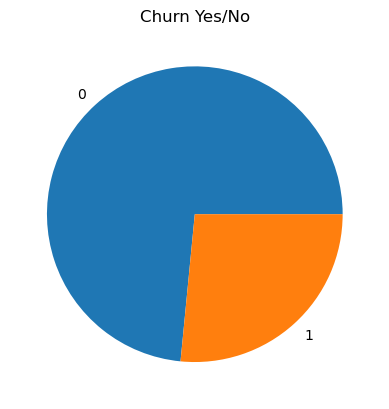

In [106]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn Yes/No")
plt.ylabel("")
plt.show()

In [107]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
0    61.843871
1    74.947244
Name: MonthlyCharges, dtype: float64

In [108]:
df.groupby("Churn")["tenure"].mean()

Churn
0    37.971669
1    18.033385
Name: tenure, dtype: float64

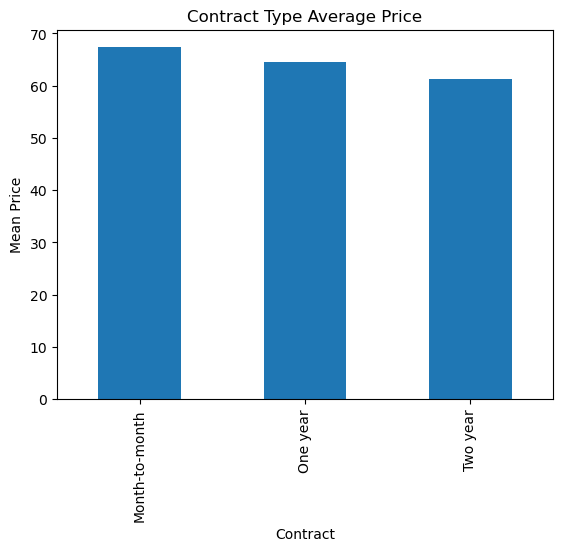

In [109]:
df.groupby("Contract")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract")
plt.title("Contract Type Average Price")
plt.show()


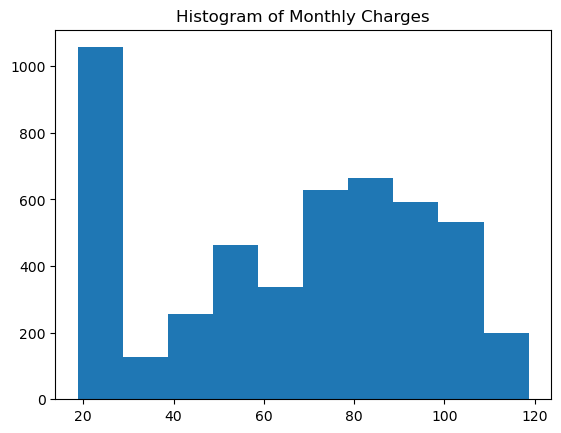

In [110]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

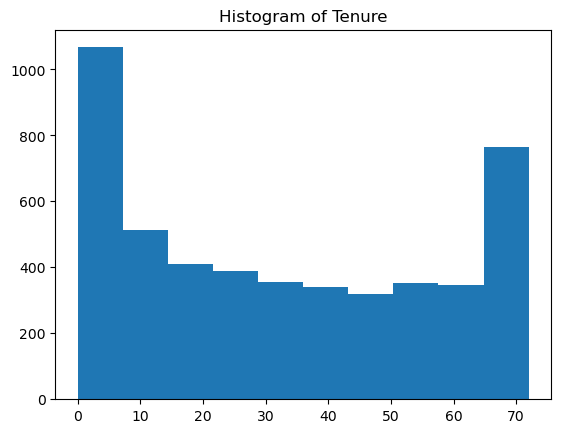

In [111]:
plt.hist(df["tenure"])
plt.title("Histogram of Tenure")
plt.show()

### B. Data Splitting

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4853 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4853 non-null   object 
 1   tenure            4853 non-null   int64  
 2   OnlineSecurity    4853 non-null   object 
 3   OnlineBackup      4853 non-null   object 
 4   InternetService   4853 non-null   object 
 5   DeviceProtection  4853 non-null   object 
 6   TechSupport       4853 non-null   object 
 7   Contract          4853 non-null   object 
 8   PaperlessBilling  4853 non-null   object 
 9   MonthlyCharges    4853 non-null   float64
 10  Churn             4853 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 455.0+ KB


In [113]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3639, 10)

(1214, 10)

(3639,)

(1214,)

In [114]:
# Merge Train Data
train = X_train.copy()
train[y_train.name] = y_train.values

# Merge Test Data
test = X_test.copy()
test[y_test.name] = y_test.values

# Preview
display(train.head(), test.head())


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
693,No,3,No,No,DSL,No,Yes,Month-to-month,Yes,50.25,0
1172,Yes,70,Yes,Yes,DSL,No,Yes,Two year,No,66.00,0
349,No,2,No,No,DSL,No,No,Month-to-month,Yes,25.05,1
306,Yes,9,No,No,Fiber optic,Yes,Yes,Month-to-month,No,103.10,0
946,No,72,No,Yes,Fiber optic,Yes,Yes,Two year,Yes,109.75,0


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
4260,No,17,Yes,No,Fiber optic,No,No,Month-to-month,No,93.85,1
2221,Yes,72,Yes,Yes,DSL,Yes,Yes,Two year,No,64.45,0
3652,No,10,Yes,No,DSL,No,No,Month-to-month,Yes,51.65,0
1321,Yes,19,Yes,No,DSL,No,No,One year,Yes,48.95,0
2253,No,49,No,No,Fiber optic,No,No,Month-to-month,Yes,74.60,0


In [115]:
# Duplicate Count
duplicates_count = train[train.duplicated()].shape[0]
persentage_duplicates = round((duplicates_count / len(train)) * 100, 2)

# MIissing Value Count
missing_percentage = train.isnull().sum() / len(train) * 100
missing_percentage = missing_percentage.round(4).astype(str) + '%'

total_missing = train.isnull().sum()

# Insight
info_train = pd.DataFrame({
    'Column': train.columns.tolist(),
    'Missing Percentage (%)': missing_percentage.values,
    'Total Missing Values': total_missing.values
})

# Preview
display(info_train)


,Column,Missing Percentage (%),Total Missing Values
0,Dependents,0.0%,0
1,tenure,0.0%,0
2,OnlineSecurity,0.0%,0
3,OnlineBackup,0.0%,0
4,InternetService,0.0%,0
5,DeviceProtection,0.0%,0
6,TechSupport,0.0%,0
7,Contract,0.0%,0
8,PaperlessBilling,0.0%,0
9,MonthlyCharges,0.0%,0


In [116]:
# Descriptive Statistic Insight

numeric_summary = train.select_dtypes(include='number').describe()

object_summary = train.select_dtypes(include='object').describe()

display(numeric_summary, object_summary)

,tenure,MonthlyCharges,Churn
count,3639.000000,3639.000000,3639.000000
mean,32.798846,65.376408,0.265458
std,24.397336,29.838035,0.441637
min,0.000000,18.800000,0.000000
25%,9.000000,39.675000,0.000000
50%,30.000000,70.700000,0.000000
75%,56.000000,90.125000,1.000000
max,72.000000,118.650000,1.000000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling
count,3639,3639,3639,3639,3639,3639,3639,3639
unique,2,3,3,3,3,3,3,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes
freq,2548,1817,1587,1635,1645,1838,1993,2201


In [117]:
columns_of_interest = [
    'Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
    'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'Churn'
]

# Train Data
unique_col_train = pd.DataFrame({
    'Column': columns_of_interest,
    'Number of Unique': [train[col].nunique() for col in columns_of_interest],
    'Unique Value': [train[col].unique() for col in columns_of_interest]
})

# Test Data
unique_col_test = pd.DataFrame({
    'Column': columns_of_interest,
    'Number of Unique': [test[col].nunique() for col in columns_of_interest],
    'Unique Value': [test[col].unique() for col in columns_of_interest]
})

# Preview
print('Train')
display(unique_col_train)
print('Test')
display(unique_col_test)


Train


,Column,Number of Unique,Unique Value
0,Dependents,2,"[No, Yes]"
1,OnlineSecurity,3,"[No, Yes, No internet service]"
2,OnlineBackup,3,"[No, Yes, No internet service]"
3,InternetService,3,"[DSL, Fiber optic, No]"
4,DeviceProtection,3,"[No, Yes, No internet service]"
5,TechSupport,3,"[Yes, No, No internet service]"
6,Contract,3,"[Month-to-month, Two year, One year]"
7,PaperlessBilling,2,"[Yes, No]"
8,Churn,2,"[0, 1]"


Test


,Column,Number of Unique,Unique Value
0,Dependents,2,"[No, Yes]"
1,OnlineSecurity,3,"[Yes, No, No internet service]"
2,OnlineBackup,3,"[No, Yes, No internet service]"
3,InternetService,3,"[Fiber optic, DSL, No]"
4,DeviceProtection,3,"[No, Yes, No internet service]"
5,TechSupport,3,"[No, Yes, No internet service]"
6,Contract,3,"[Month-to-month, Two year, One year]"
7,PaperlessBilling,2,"[No, Yes]"
8,Churn,2,"[1, 0]"


### C. Exploratory Data Analysis

#### C.1 Distribution Data Analysis

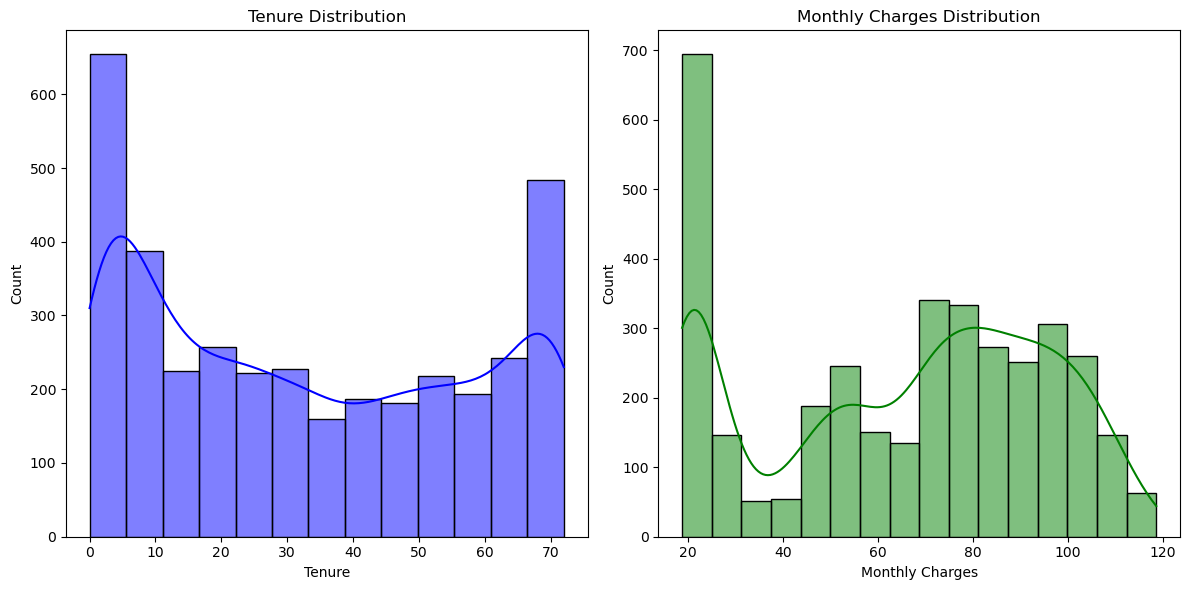

In [118]:
# DISTRIBUTION DATA ANALYSIS

fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Plot distribusi tenure
sns.histplot(train['tenure'], kde=True, ax=axes[0], color='blue')
axes[0].set(title='Tenure Distribution', xlabel='Tenure')

# Plot distribusi MonthlyCharges
sns.histplot(train['MonthlyCharges'], kde=True, ax=axes[1], color='green')
axes[1].set(title='Monthly Charges Distribution', xlabel='Monthly Charges')

plt.tight_layout()
plt.show()


Insight:

🔹Tenure Distribution
The distribution is bimodal:

A large number of customers have very short tenure (less than 10 months), indicating early churn or new customers.

Another peak appears near the maximum tenure (around 70 months), indicating a segment of very loyal, long-term customers.

There's a noticeable drop in mid-tenure (20–50 months), suggesting that many customers leave the service before reaching mid-term loyalty.

📌 Insight: Your customer base may consist of two dominant groups: those who churn quickly and those who stay long-term. A targeted retention strategy is needed for new customers in their first year.

🔹 Monthly Charges Distribution
The distribution is right-skewed with two broad peaks:

One near the low monthly charges (around $20–30).

Another around $70–90, indicating a significant number of customers pay premium charges.

Very few customers are in the mid-range ($40–60), possibly because the pricing plans are segmented into basic and premium tiers.

📌 Insight: The company likely offers distinct pricing tiers (basic vs. premium). You could explore how these tiers correlate with churn, tenure, and service usage.

#### C.2 Categorical Data - Insight

C:\Users\Tapik\AppData\Local\Temp\ipykernel_18472\665080360.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[feature], ax=ax, palette='crest', edgecolor='black')
C:\Users\Tapik\AppData\Local\Temp\ipykernel_18472\665080360.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[feature], ax=ax, palette='crest', edgecolor='black')
C:\Users\Tapik\AppData\Local\Temp\ipykernel_18472\665080360.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[feature], ax=ax, palette='crest', edgecolor='black')
C:\Users\Tapik\AppD

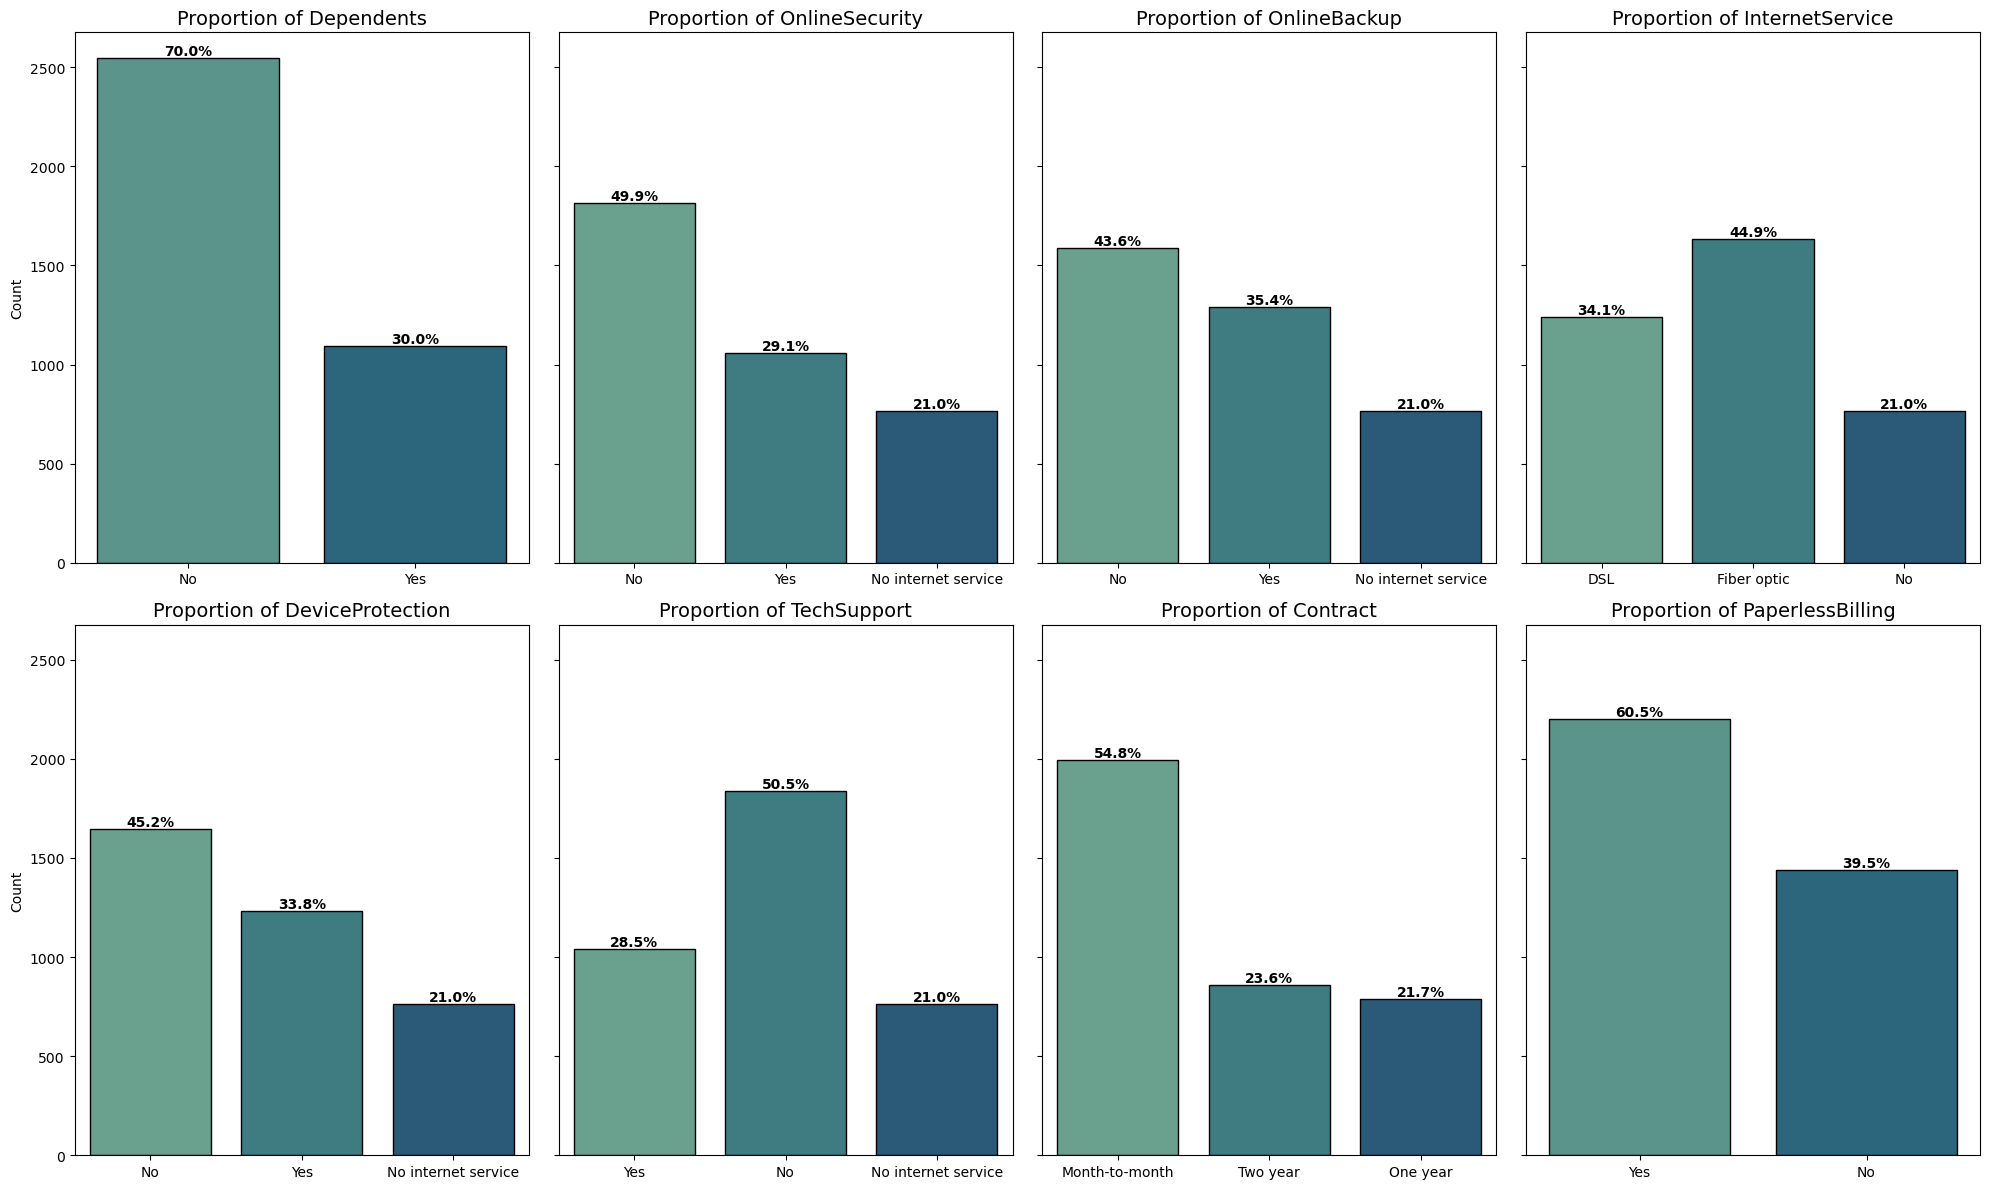

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns


cols = [
    'Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
    'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'
]

fig, axes = plt.subplots(2, 4, figsize=(20, 12), sharey=True)

for idx, feature in enumerate(cols):
    row_idx, col_idx = divmod(idx, 4)
    ax = axes[row_idx, col_idx]

    sns.countplot(x=train[feature], ax=ax, palette='crest', edgecolor='black')
    ax.set_title(f'Proportion of {feature}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Count' if col_idx == 0 else '')

    total_count = len(train)
    for patch in ax.patches:
        height = patch.get_height()
        pct = f"{(height / total_count) * 100:.1f}%"
        ax.annotate(pct, (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


Insight:
- Fitur-fitur tambahan seperti keamanan, dukungan teknis, dan proteksi perangkat masih rendah adopsinya.

- Mayoritas pelanggan menginginkan fleksibilitas (kontrak jangka pendek) dan layanan digital (paperless billing, internet).

- Peluang besar untuk upselling fitur tambahan dengan pendekatan yang mendidik dan berbasis nilai nyata.

#### C.3 Churn - Train Data Analysis

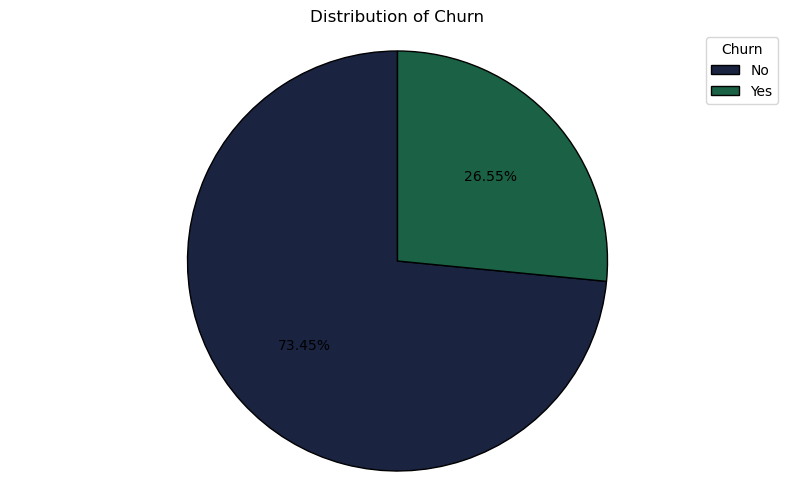

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping label
churn_counts = train['Churn'].value_counts().sort_index()  
labels = ['No', 'Yes']  # 0 = No, 1 = Yes

# Plot pie chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(
    churn_counts.values,
    labels=None,  
    autopct='%.2f%%',
    startangle=90,
    colors=sns.color_palette('cubehelix'),
    wedgeprops={'edgecolor': 'black'}
)

ax.set_title('Distribution of Churn')
ax.axis('equal')  # agar pie tetap bulat
plt.legend(title='Churn', labels=labels, loc='upper right')
plt.show()


🔍 INSIGHT: 
- Rasio churn sebesar 26.55% tergolong cukup tinggi dalam industri layanan berlangganan.
- Ini menunjukkan bahwa lebih dari 1 dari setiap 4 pelanggan memutuskan untuk berhenti menggunakan layanan.

#### C.4 Churn Rate per Feature

C:\Users\Tapik\AppData\Local\Temp\ipykernel_18472\1570446483.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Tapik\AppData\Local\Temp\ipykernel_18472\1570446483.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Tapik\AppData\Local\Temp\ipykernel_18472\1570446483.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Tapik\AppData\Local\Temp\ipykernel_18472\1570446483.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

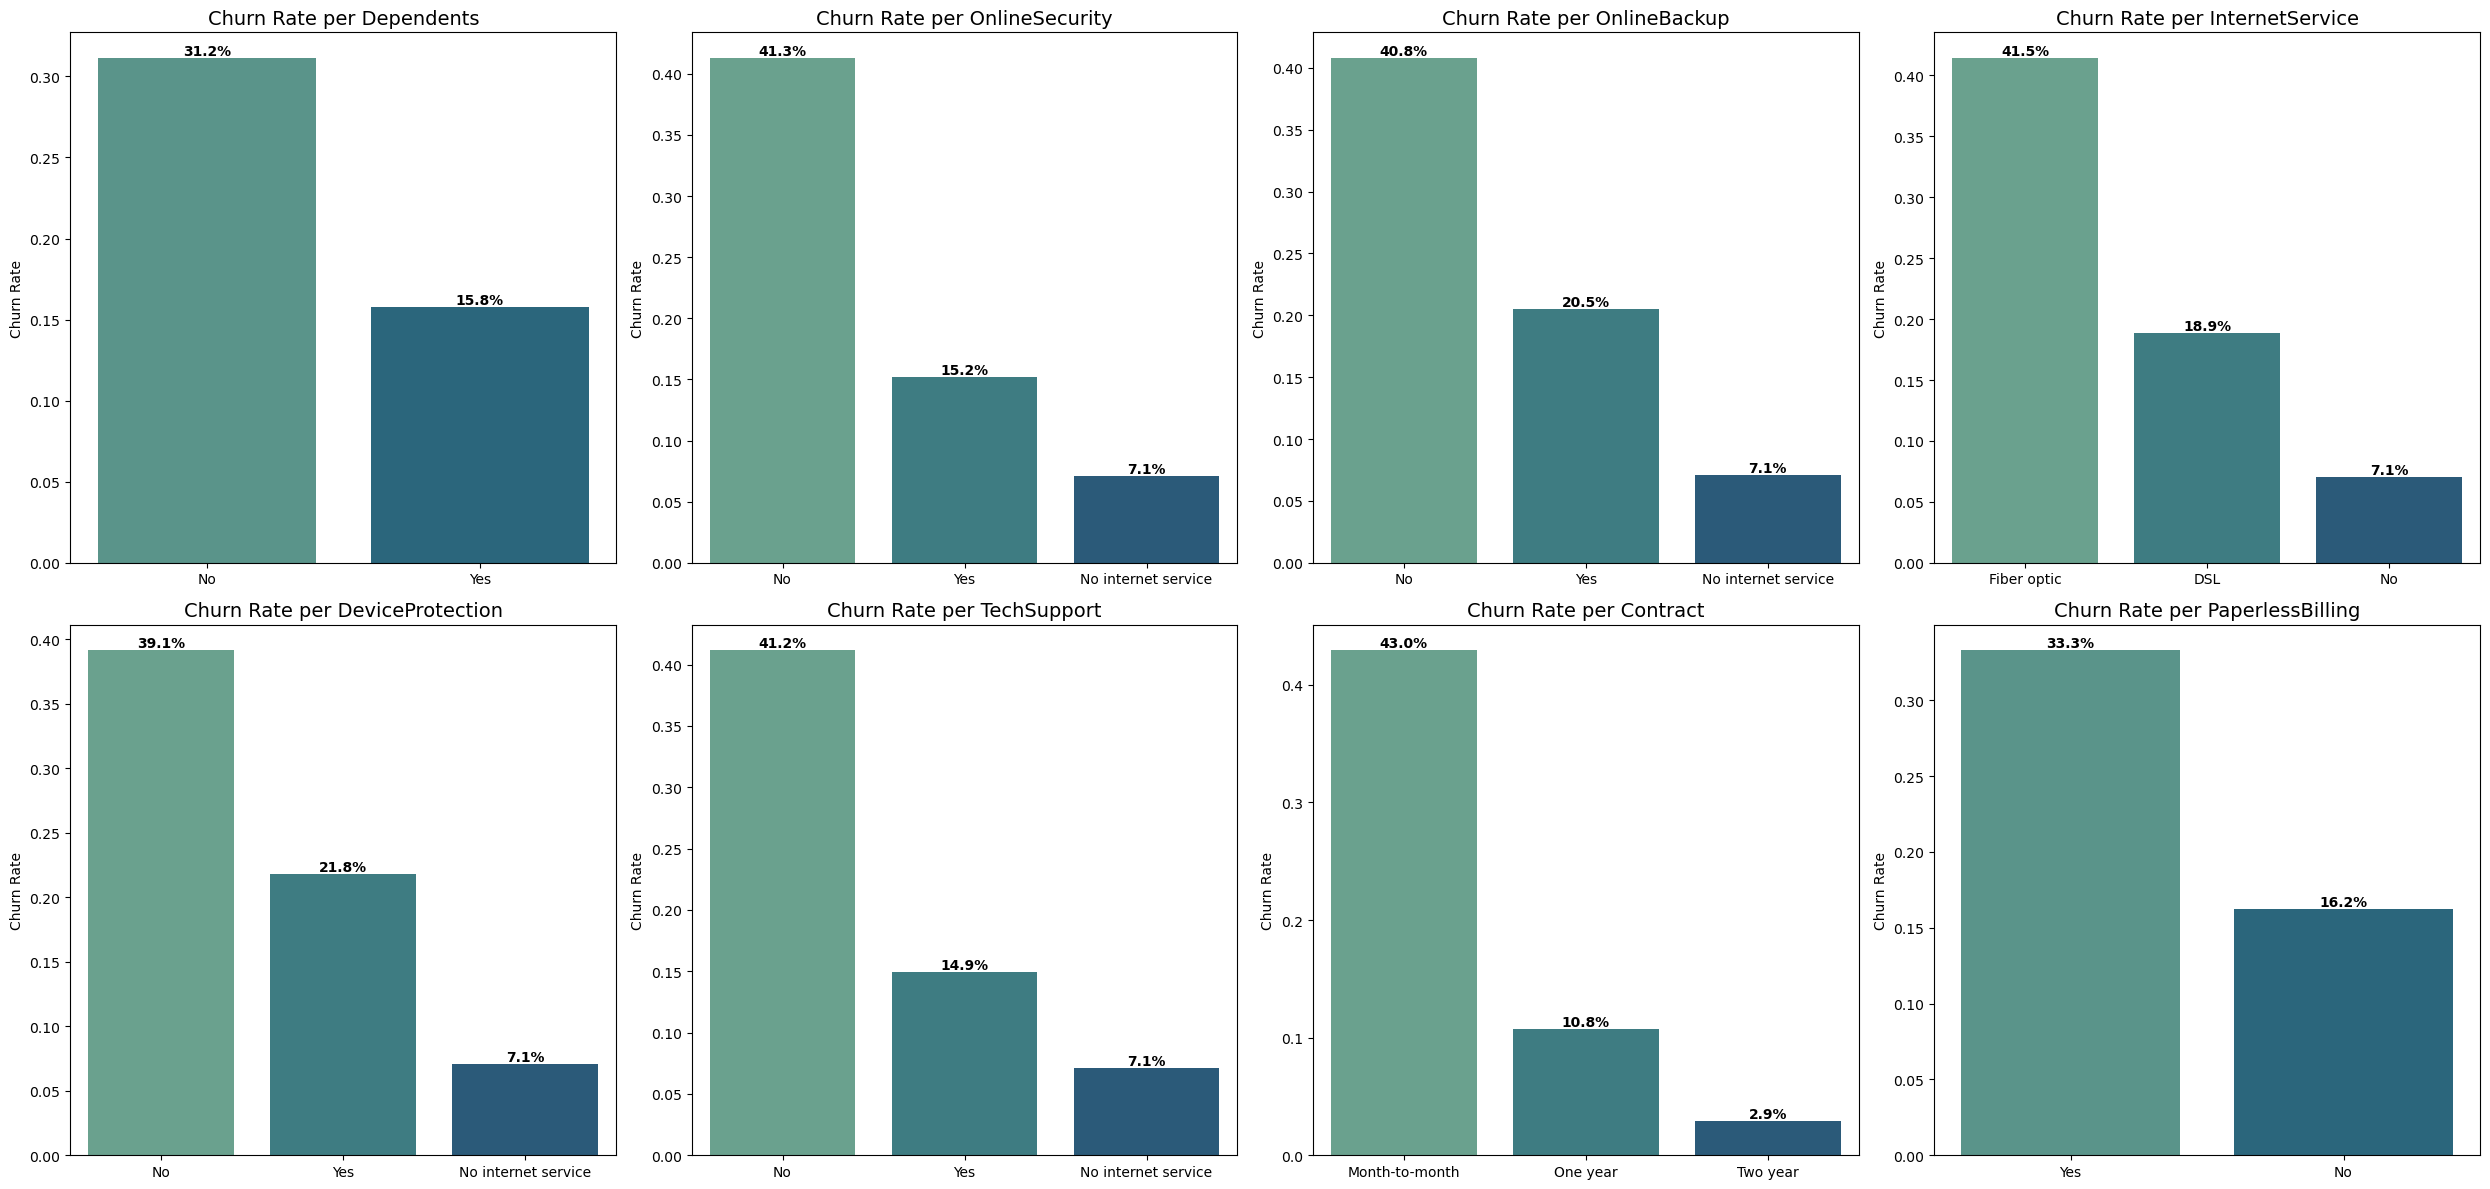

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = [
    'Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
    'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'
]

fig, axes = plt.subplots(2, 4, figsize=(25, 12))

for idx, feature in enumerate(cols):
    row, col_idx = divmod(idx, 4)

    # Hitung churn rate untuk tiap kategori
    churn_data = train.groupby(feature)['Churn'].mean().reset_index()
    churn_data.columns = [feature, 'Churn Rate']
    churn_data.sort_values(by='Churn Rate', ascending=False, inplace=True)

    # Plot barplot
    sns.barplot(
        x=feature, y='Churn Rate',
        data=churn_data,
        palette='crest',
        ax=axes[row, col_idx]
    )

    # Judul dan label
    axes[row, col_idx].set_title(f'Churn Rate per {feature}', fontsize=14)
    axes[row, col_idx].set_xlabel('')
    axes[row, col_idx].set_ylabel('Churn Rate')

    # Tampilkan persentase di atas bar
    for bar in axes[row, col_idx].patches:
        height = bar.get_height()
        label = f'{height * 100:.1f}%'
        axes[row, col_idx].annotate(
            label,
            (bar.get_x() + bar.get_width() / 2, height),
            ha='center', va='bottom',
            fontsize=10, weight='bold'
        )

plt.tight_layout()
plt.show()


🔍 INSIGHT:

| Feature | Insight |
| --- | --- |
| Contract Type | Kontrak jangka pendek berasosiasi kuat dengan churn — ini memperkuat insight sebelumnya bahwa mayoritas pelanggan memilih fleksibilitas, namun fleksibilitas ini berisiko churn |
| OnlineSecurity, OnlineBackup, TechSupport, DeviceProtection | Layanan tambahan yang memberi rasa aman dan dukungan teknis menurunkan kemungkinan churn — ini mendukung insight sebelumnya bahwa fitur-fitur ini belum banyak digunakan, padahal punya efek positif pada retensi. |
| InternetService | Fiber optic mungkin menarik pelanggan baru, tapi juga bisa memicu churn karena ekspektasi tinggi yang tidak selalu terpenuhi. |
| PaperlessBilling | Hipotesis: Ini bisa jadi karena pelanggan digital lebih muda, lebih aktif membandingkan layanan, dan lebih cepat mengambil keputusan untuk pindah penyedia. |
| Dependents | Pelanggan lajang atau tanpa tanggungan mungkin lebih fleksibel dan tidak terlalu terikat dengan layanan, sehingga lebih cepat churn. |

#### C.5 Data Outlier using Boxplot

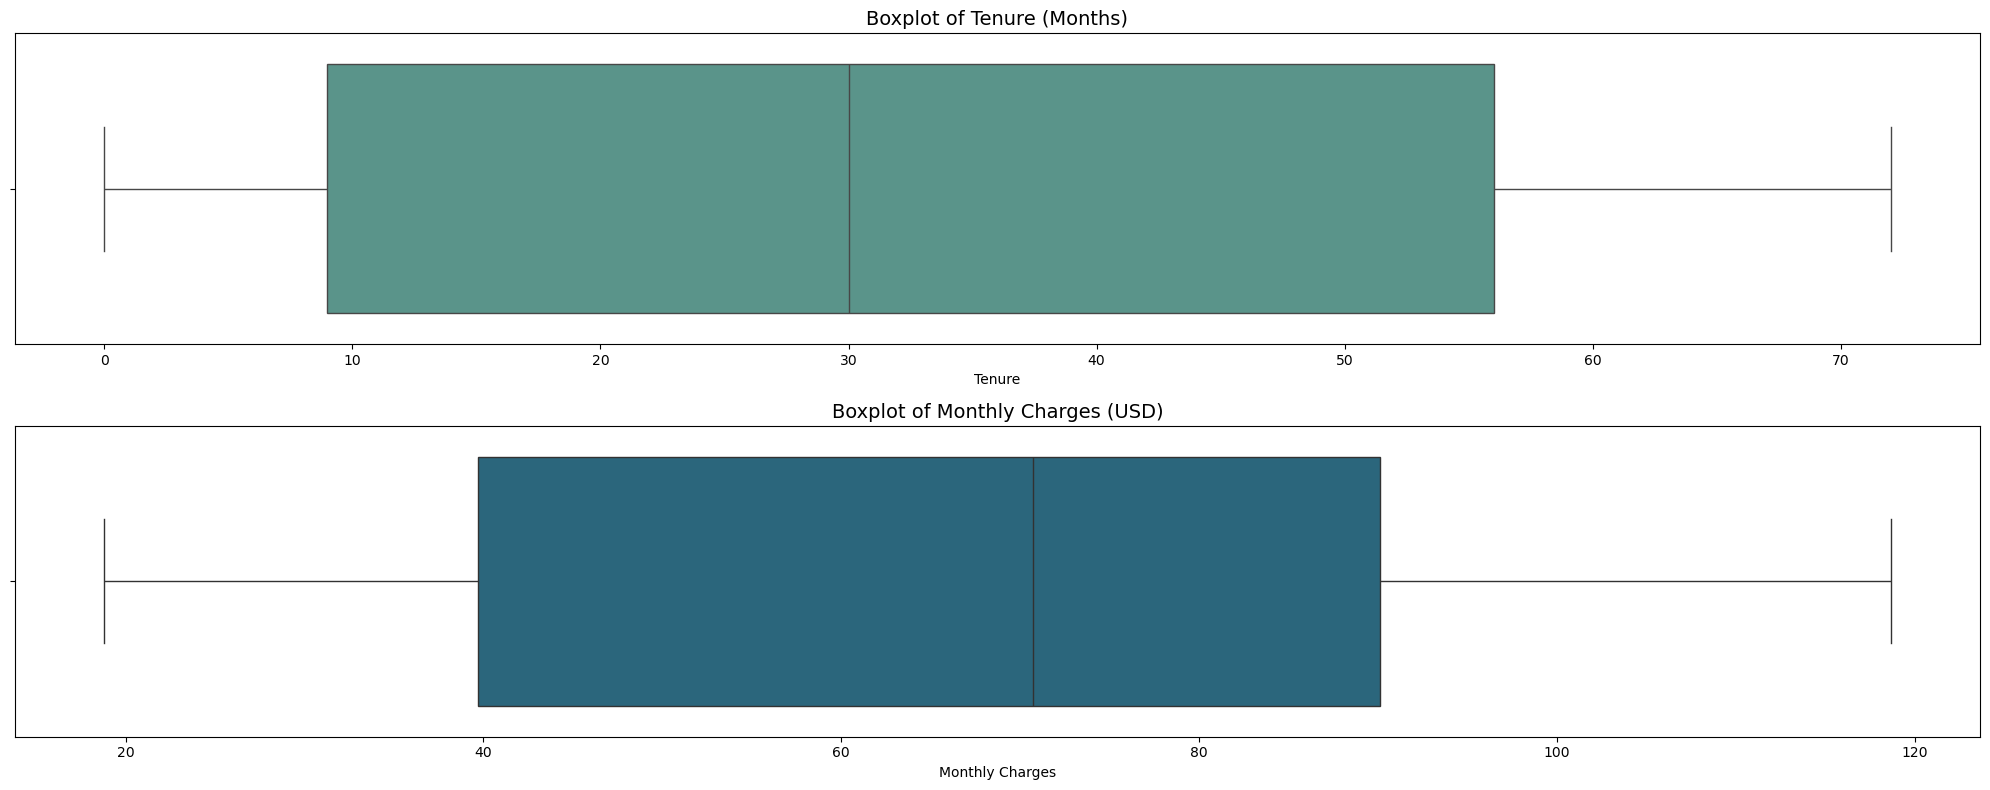

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

crest_palette = sns.color_palette("crest", n_colors=2)

fig, axes = plt.subplots(2, 1, figsize=(20, 8))

# Boxplot untuk Tenure
sns.boxplot(
    x=train['tenure'],
    ax=axes[0],
    color=crest_palette[0]
)
axes[0].set_title('Boxplot of Tenure (Months)', fontsize=14)
axes[0].set_xlabel('Tenure')

# Boxplot untuk MonthlyCharges
sns.boxplot(
    x=train['MonthlyCharges'],
    ax=axes[1],
    color=crest_palette[1]
)
axes[1].set_title('Boxplot of Monthly Charges (USD)', fontsize=14)
axes[1].set_xlabel('Monthly Charges')

plt.tight_layout()
plt.show()


INSIGHT:

- Distribusi data cukup simetris, tanpa outlier yang signifikan.

- Tenure pendek + biaya tinggi bisa menunjukkan pelanggan yang tidak puas dan segera keluar (indikasi churn tinggi).

- Tenure panjang + biaya rendah atau sedang bisa menandakan pelanggan setia namun sensitif harga.

Berdasarkan kondisi tersebut tidak dibutuhkan penanganan outlier atas data ini.


### D. Feature Engeenering ###

Mempertimbangkan sedikitnya jenis data dalam dataset, diperlukan fitur tambahan yang akan ditambahkan untuk dapat meningkatkan kualitas dan modeling.

Daftar Fitur Tambahan yang dimaksud adalah sebagai berikut:
1. TotalCharges
2. TenureGroup

Tenure Group

| Tenure Group | Rentang Tenure (bulan) | Keterangan                                                                                     |
|--------------|------------------------|---------------------------------------------------------------------------------------------------|
| New          | 0 - 12                 | Menggambarkan kelompok pelanggan yang masih awal dan sebagian besar lebih sensitif untuk churn |
| Medium       | 13 - 24                | Menggambarkan kelompok pelanggan yang sudah mulai setia dan nyaman dengan layanan yang diterima.         |
| Long         | >24                    | Menunjukkan kelompok pelanggan loyal |

#### D.1 Penambahan Fitur Tambahan pada Train Data

In [123]:
# Buat grup tenure sesuai rentang group
train['tenure_group'] = pd.cut(train['tenure'],
                               bins=[0, 12, 24, train['tenure'].max()],
                               labels=['New', 'Medium', 'Long'],
                               include_lowest=True,  
                               right=True)            

# Buat fitur TotalCharges
train['TotalCharges'] = train['tenure'] * train['MonthlyCharges']

train.head(10)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,tenure_group,TotalCharges
693,No,3,No,No,DSL,No,Yes,Month-to-month,Yes,50.25,0,New,150.75
1172,Yes,70,Yes,Yes,DSL,No,Yes,Two year,No,66.00,0,Long,4620.00
349,No,2,No,No,DSL,No,No,Month-to-month,Yes,25.05,1,New,50.10
306,Yes,9,No,No,Fiber optic,Yes,Yes,Month-to-month,No,103.10,0,New,927.90
946,No,72,No,Yes,Fiber optic,Yes,Yes,Two year,Yes,109.75,0,Long,7902.00
4598,Yes,32,No,Yes,Fiber optic,No,No,Month-to-month,Yes,98.85,0,Long,3163.20
2176,No,42,No,No,Fiber optic,Yes,Yes,Two year,Yes,99.00,0,Long,4158.00
3100,Yes,63,Yes,Yes,DSL,Yes,Yes,Two year,Yes,89.40,0,Long,5632.20
2180,No,62,No,Yes,Fiber optic,Yes,No,One year,Yes,97.95,0,Long,6072.90
2762,Yes,69,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.90,0,Long,1373.10


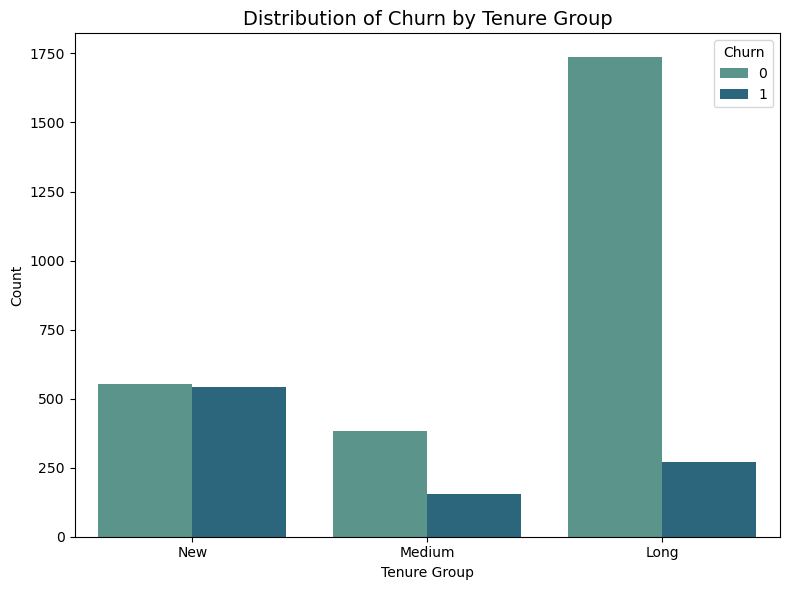

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='tenure_group', hue='Churn', data=train, palette='crest')
plt.title('Distribution of Churn by Tenure Group', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Tenure Group')
plt.tight_layout()
plt.show()


#### D.2 Penambahan Fitur Tambahan pada Test Data

In [125]:
# Buat grup tenure sesuai rentang group
test['tenure_group'] = pd.cut(test['tenure'],
                               bins=[0, 12, 24, train['tenure'].max()],
                               labels=['New', 'Medium', 'Long'],
                               include_lowest=True,  
                               right=True)            

# Buat fitur TotalCharges
test['TotalCharges'] = test['tenure'] * test['MonthlyCharges']

test.head(10)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,tenure_group,TotalCharges
4260,No,17,Yes,No,Fiber optic,No,No,Month-to-month,No,93.85,1,Medium,1595.45
2221,Yes,72,Yes,Yes,DSL,Yes,Yes,Two year,No,64.45,0,Long,4640.40
3652,No,10,Yes,No,DSL,No,No,Month-to-month,Yes,51.65,0,New,516.50
1321,Yes,19,Yes,No,DSL,No,No,One year,Yes,48.95,0,Medium,930.05
2253,No,49,No,No,Fiber optic,No,No,Month-to-month,Yes,74.60,0,Long,3655.40
154,Yes,65,No,Yes,DSL,Yes,Yes,Two year,Yes,84.20,0,Long,5473.00
1298,No,54,No,No,Fiber optic,Yes,No,One year,Yes,94.10,0,Long,5081.40
1603,Yes,6,No,No,DSL,No,Yes,Month-to-month,Yes,48.80,0,New,292.80
1397,Yes,25,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,25.40,0,Long,635.00
4619,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,74.95,1,New,74.95


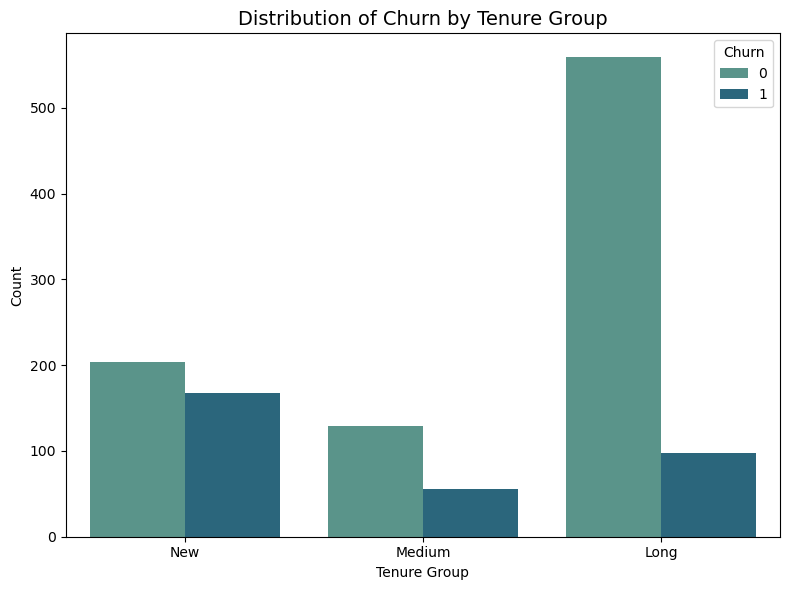

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='tenure_group', hue='Churn', data=test, palette='crest')
plt.title('Distribution of Churn by Tenure Group', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Tenure Group')
plt.tight_layout()
plt.show()

#### D.3 Encoding & Data Scalling

1. **One-Hot Encoding:**  Mengonversi kolom kategorikal tanpa urutan menjadi kolom biner.

2. **Ordinal Encoding:** Mengonversi kolom dengan urutan (`Contract` dan `tenure_group`) menjadi nilai numerik yang memiliki tingkatan

3. **RobustScaler:** Mengonversi kolom numerik karena data tidak terdistribusi normal.

In [127]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

# Step 1: 
categorical_columns = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']
ordinal_columns = ['Contract', 'tenure_group']
numerical_columns = ['TotalCharges', 'MonthlyCharges', 'tenure']

# Step 2: Urutan ordinal encoding
contract_order = ['Month-to-month', 'One year', 'Two year']
tenure_group_order = ['New', 'Medium', 'Long']

# Step 3: Tentukan indikator encoding

# OneHotEncoder untuk kolom kategorikal
onehot_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# OrdinalEncoder untuk kolom yang memiliki urutan tertentu
ordinal_transformer = OrdinalEncoder(categories=[contract_order, tenure_group_order])

# RobustScaler
scaler = RobustScaler()

# Step 4: Buat ColumnTransformer untuk menggabungkan semua transformasi
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_transformer, categorical_columns), 
        ('ord', ordinal_transformer, ordinal_columns),  
        ('num', scaler, numerical_columns)  
    ],
)

#### D.4 Penentuan Fitur dan Target

In [128]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
X_train = train.drop("Churn", axis=1)
y_train = train["Churn"]

X_test = test.drop("Churn", axis=1)
y_test = test["Churn"]

In [129]:
# Cek data setelah proses endoing dan scalling

encoder_check = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
encoder_check.head()

,cat__Dependents_Yes,cat__OnlineSecurity_No internet service,cat__OnlineSecurity_Yes,cat__OnlineBackup_No internet service,cat__OnlineBackup_Yes,cat__InternetService_Fiber optic,cat__InternetService_No,cat__DeviceProtection_No internet service,cat__DeviceProtection_Yes,cat__TechSupport_No internet service,cat__TechSupport_Yes,cat__PaperlessBilling_Yes,ord__Contract,ord__tenure_group,num__TotalCharges,num__MonthlyCharges,num__tenure
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.387814,-0.405352,-0.574468
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.945395,-0.093162,0.851064
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.417839,-0.904856,-0.595745
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.155985,0.642220,-0.446809
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,1.924439,0.774034,0.893617


### E. Modeling and Evaluation

Outline

1. Baseline Model Development

🎯 Tujuan:
Membangun model dasar menggunakan parameter default untuk mendapatkan gambaran awal performa tanpa tuning.

⚙️ Model yang Digunakan:
- RandomForestClassifier  
- DecisionTreeClassifier  
- XGBClassifier  
- CatBoostClassifier  
- GradientBoostingClassifier  
- LGBMClassifier  
- KNeighborsClassifier  
- PassiveAggressiveClassifier

📊 Evaluasi:
- **Metrik:** F1 Score dan F2 Score  
- **Data:** Evaluasi dilakukan pada data training dan testing  
- **Output:** Menentukan baseline model terbaik berdasarkan skor tertinggi

---

2. Resampling & Feature Selection

🎯 Tujuan:
Mengatasi masalah class imbalance dan menguji pengaruh seleksi fitur terhadap performa model.

🔄 Teknik Resampling:
- SMOTE  
- RandomOverSampler  
- ADASYN  
- SMOTETomek  
- SMOTEENN

📌 Feature Selection:
- Menggunakan `SelectKBest` untuk memilih fitur terbaik berdasarkan korelasi terhadap target

📊 Evaluasi:
- **Metrik:** F1 & F2 Score  
- **Data:** Training & Testing  
- **Kombinasi yang dievaluasi:**
  - Model + Resampler  
  - Model + Feature Selection  
  - Model + Resampler + Feature Selection  
- **Output:** Menentukan kombinasi terbaik untuk setiap model baseline

---

3. Hyperparameter Tuning

🎯 Tujuan:
Mengoptimalkan model baseline terbaik untuk meningkatkan performa prediksi.

⚙️ Proses:
- Menggunakan `GridSearchCV` untuk pencarian parameter terbaik  
- Dilakukan pada model hasil evaluasi terbaik sebelumnya

📊 Evaluasi:
- **Metrik:** F1 & F2 Score (sebelum dan sesudah tuning)  
- **Output:** Model terbaik dengan parameter optimal

---

4. Learning Curve Analysis

🎯 Tujuan:
Menilai kestabilan dan generalisasi model terhadap data baru

📈 Proses:
- Membuat plot learning curve berdasarkan akurasi/training loss dan validation loss  
- Mendeteksi overfitting atau underfitting

---

5. Threshold Optimization

🎯 Tujuan:
Menyesuaikan threshold probabilitas prediksi untuk memaksimalkan F2 Score (fokus pada recall).

⚙️ Proses:
- Mencari threshold optimal pada data training  
- Menerapkan threshold tersebut pada data testing

📊 Evaluasi:
- Membandingkan metrik F1 dan F2 Score sebelum dan sesudah pengaturan threshold  
- **Output:** Final model dengan threshold optimal untuk kebutuhan spesifik


#### E.1 Baseline Model Development

In [130]:
!pip install xgboost

In [135]:
!pip install lightgbm catboost


In [136]:
# === Pipeline & Feature Selection ===
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# === Resampling Techniques ===
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import (
    RandomUnderSampler, NearMiss, ClusterCentroids, 
    CondensedNearestNeighbour, TomekLinks
)
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# === Evaluation Metrics ===
from sklearn.metrics import (
    make_scorer, fbeta_score, f1_score, roc_auc_score,
    precision_recall_curve, roc_curve,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# === Model Optimization ===
from sklearn.model_selection import GridSearchCV

# === Classifiers ===

## Tree-based & Ensemble Models
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    ExtraTreesClassifier, BaggingClassifier
)

## Linear Models
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, 
    PassiveAggressiveClassifier, Perceptron
)

## Others
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

## External Boosting Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# === Utility ===
import time


In [137]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import GridSearchCV
import time

# Pipeline: preprocessing, resampling, classifier
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('resampler', SMOTE(random_state=99)),
    ('classifier', RandomForestClassifier())  # placeholder
])

# Scorer: F2 score as custom metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Grid of classifiers to test
classifiers = [
    RandomForestClassifier(random_state=99),
    DecisionTreeClassifier(random_state=99),
    XGBClassifier(random_state=99),
    CatBoostClassifier(random_state=99, verbose=0),
    GradientBoostingClassifier(random_state=99),
    LGBMClassifier(random_state=99),
    KNeighborsClassifier(),
    PassiveAggressiveClassifier(random_state=99),
]

param_grid = {'classifier': classifiers}

# GridSearchCV setup
gscv = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring={'f1': 'f1', 'f2': f2_scorer},
    refit='f2',
    cv=5,
    n_jobs=-1
)

# Training and timing
start_time = time.time()
gscv.fit(X_train, y_train)
fitting_time = time.time() - start_time

# Output best result
print(f"Fitting time: {fitting_time:.2f} seconds")
print("Best Params:", gscv.best_params_)
print("Best Score:", gscv.best_score_)


Fitting time: 7.89 seconds
Best Params: {'classifier': GradientBoostingClassifier(random_state=99)}
Best Score: 0.6841922020040212


Hasil GridSearchCV

- Model Terbaik: GradientBoostingClassifier(random_state=99). Dipilih karena memberikan skor F2 terbaik

- Skor F2 Terbaik F2 Score (mean cross-validation): 0.684

✅ Model ini cukup baik dalam menangkap positive class (Churn), dengan penekanan lebih kuat ke Recall dibanding Precision

In [138]:
pd.DataFrame(gscv.cv_results_).sort_values("rank_test_f2").head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_f2,split1_test_f2,split2_test_f2,split3_test_f2,split4_test_f2,mean_test_f2,std_test_f2,rank_test_f2
4,1.192889,0.120122,0.015978,0.001400,GradientBoostingClassifier(random_state=99),{'classifier': GradientBoostingClassifier(rand...,0.615711,0.650113,0.649412,0.591422,0.640000,0.629332,0.022678,1,0.690476,0.704501,0.687251,0.639024,0.699708,0.684192,0.023419,1
3,5.020049,0.364866,0.020418,0.003315,<catboost.core.CatBoostClassifier object at 0x...,{'classifier': <catboost.core.CatBoostClassifi...,0.617778,0.614286,0.645477,0.578199,0.657343,0.622616,0.027547,2,0.675413,0.645646,0.668016,0.607570,0.699405,0.659210,0.031005,2
5,3.952614,1.876944,0.018515,0.001270,LGBMClassifier(random_state=99),{'classifier': LGBMClassifier(random_state=99)},0.609091,0.617925,0.597015,0.566667,0.671264,0.612392,0.034161,3,0.657507,0.653041,0.611621,0.593812,0.719921,0.647181,0.043692,3
6,0.038892,0.002138,0.040957,0.003368,KNeighborsClassifier(),{'classifier': KNeighborsClassifier()},0.582677,0.543897,0.575893,0.526096,0.605150,0.566743,0.028238,6,0.680773,0.607075,0.628043,0.593779,0.674641,0.636862,0.035147,4
7,0.055937,0.013527,0.032236,0.015063,PassiveAggressiveClassifier(random_state=99),{'classifier': PassiveAggressiveClassifier(ran...,0.517895,0.514970,0.622328,0.576271,0.590164,0.564326,0.041872,7,0.583491,0.470975,0.655000,0.645161,0.718085,0.614543,0.083512,5
2,0.320544,0.051928,0.030848,0.012385,"XGBClassifier(base_score=None, booster=None, c...","{'classifier': XGBClassifier(base_score=None, ...",0.598174,0.567164,0.599509,0.537897,0.642686,0.589086,0.035114,4,0.644051,0.581040,0.618661,0.554995,0.672691,0.614288,0.042278,6
0,1.034260,0.122251,0.042016,0.007832,RandomForestClassifier(random_state=99),{'classifier': RandomForestClassifier(random_s...,0.596659,0.564644,0.581152,0.498778,0.620347,0.572316,0.041096,5,0.626253,0.558455,0.577523,0.514632,0.636456,0.582664,0.044798,7
1,0.103524,0.035721,0.016100,0.001515,DecisionTreeClassifier(random_state=99),{'classifier': DecisionTreeClassifier(random_s...,0.526807,0.534314,0.474074,0.496614,0.574118,0.521185,0.034144,8,0.560516,0.552178,0.487805,0.536585,0.607570,0.548931,0.038658,8


In [139]:
# GridSearchCV
cv_results = gscv.cv_results_

# DataFrame ringkasan hasil evaluasi model
results_df = pd.DataFrame({
    'Model': [estimator.__class__.__name__ for estimator in cv_results['param_classifier']],
    'Mean F1 Score': cv_results['mean_test_f1'],
    'Std F1 Score': cv_results['std_test_f1'],
    'Mean F2 Score': cv_results['mean_test_f2'],
    'Std F2 Score': cv_results['std_test_f2']
})

# Urutan skor F2 tertinggi
sorted_results_df = results_df.sort_values('Mean F2 Score', ascending=False).reset_index(drop=True)

# Preview
sorted_results_df


,Model,Mean F1 Score,Std F1 Score,Mean F2 Score,Std F2 Score
0,GradientBoostingClassifier,0.629332,0.022678,0.684192,0.023419
1,CatBoostClassifier,0.622616,0.027547,0.659210,0.031005
2,LGBMClassifier,0.612392,0.034161,0.647181,0.043692
3,KNeighborsClassifier,0.566743,0.028238,0.636862,0.035147
4,PassiveAggressiveClassifier,0.564326,0.041872,0.614543,0.083512
5,XGBClassifier,0.589086,0.035114,0.614288,0.042278
6,RandomForestClassifier,0.572316,0.041096,0.582664,0.044798
7,DecisionTreeClassifier,0.521185,0.034144,0.548931,0.038658


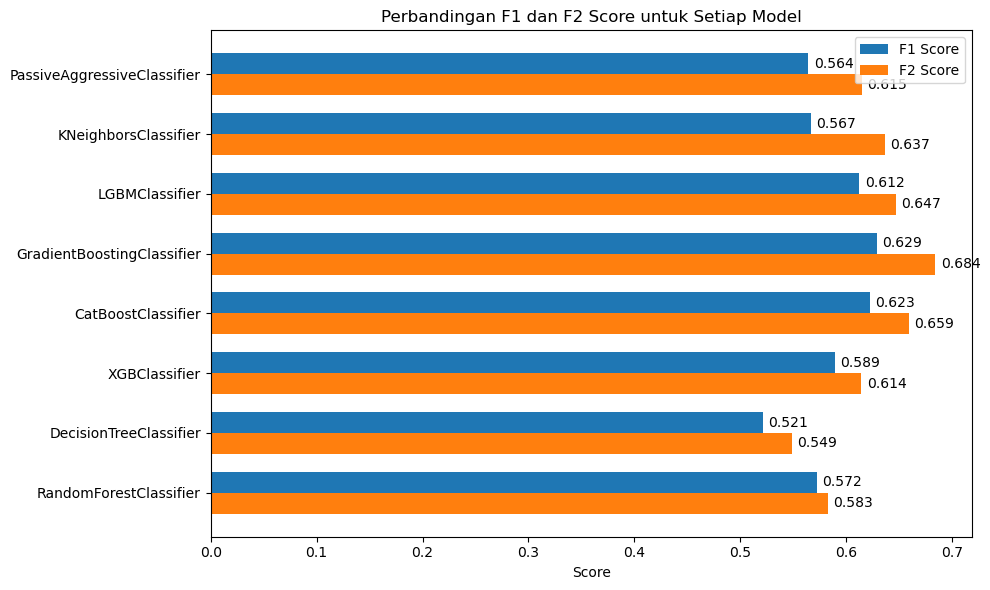

In [141]:
import matplotlib.pyplot as plt
import numpy as np

models = results_df['Model']
f1_scores = results_df['Mean F1 Score']
f2_scores = results_df['Mean F2 Score']

# Setup posisi bar
x = np.arange(len(models))
bar_width = 0.35

plt.figure(figsize=(10, 6))

# Bar chart F1 dan F2
bars_f1 = plt.barh(x + bar_width / 2, f1_scores, height=bar_width, label='F1 Score')
bars_f2 = plt.barh(x - bar_width / 2, f2_scores, height=bar_width, label='F2 Score')

for bar in bars_f1:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.3f}", va='center')

for bar in bars_f2:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.3f}", va='center')

# Atur tampilan
plt.yticks(ticks=x, labels=models)
plt.xlabel("Score")
plt.title("Perbandingan F1 dan F2 Score untuk Setiap Model")
plt.legend()
plt.tight_layout()
plt.show()


#### E.2 Resampling & Feature Selection

In [142]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN

# 1. Define resampling & feature selection options
resampling_methods = [
    SMOTE(random_state=99),
    RandomOverSampler(random_state=99),
    ADASYN(random_state=99),
    SMOTETomek(random_state=99),
    SMOTEENN(random_state=99),
    'passthrough'
]

feature_selection_methods = [
    SelectKBest(score_func=f_classif),
    'passthrough'
]

# 2. Define pipeline structure
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('resampler', 'passthrough'),
    ('feature_selection', 'passthrough'),
    ('classifier', RandomForestClassifier())
])

# 3. Define parameter grid
classifiers = [
    RandomForestClassifier(random_state=99),
    DecisionTreeClassifier(random_state=99),
    XGBClassifier(random_state=99),
    CatBoostClassifier(random_state=99, verbose=0),
    GradientBoostingClassifier(random_state=99),
    LGBMClassifier(random_state=99),
    KNeighborsClassifier(),
    PassiveAggressiveClassifier(random_state=99),
]

param_grid = {
    'resampler': resampling_methods,
    'feature_selection': feature_selection_methods,
    'classifier': classifiers
}

# 4. Setup GridSearchCV
gscv = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring={'f1': 'f1', 'f2': f2_scorer},
    refit='f2',
    cv=5,
    n_jobs=-1
)

# 5. Fit and time it
start_time = time.time()
gscv.fit(X_train, y_train)
fitting_time = time.time() - start_time

print(f"Fitting time: {fitting_time:.2f} seconds")
print("Best Params:", gscv.best_params_)
print("Best F2 Score:", gscv.best_score_)

# 6. Extract and display results
cv_results = gscv.cv_results_
results_df = pd.DataFrame({
    'Model': [est.__class__.__name__ for est in cv_results['param_classifier']],
    'Resampler': cv_results['param_resampler'],
    'Feature Selection': cv_results['param_feature_selection'],
    'Mean F1 Score': cv_results['mean_test_f1'],
    'Std F1 Score': cv_results['std_test_f1'],
    'Mean F2 Score': cv_results['mean_test_f2'],
    'Std F2 Score': cv_results['std_test_f2']
})

sorted_results_df = results_df.sort_values(by='Mean F2 Score', ascending=False).reset_index(drop=True)
sorted_results_df.head(10)


Fitting time: 104.51 seconds
Best Params: {'classifier': GradientBoostingClassifier(random_state=99), 'feature_selection': 'passthrough', 'resampler': SMOTEENN(random_state=99)}
Best F2 Score: 0.7198256853884021


,Model,Resampler,Feature Selection,Mean F1 Score,Std F1 Score,Mean F2 Score,Std F2 Score
0,GradientBoostingClassifier,SMOTEENN(random_state=99),passthrough,0.628621,0.019766,0.719826,0.024486
1,GradientBoostingClassifier,SMOTEENN(random_state=99),SelectKBest(),0.614877,0.023870,0.715421,0.023521
2,GradientBoostingClassifier,ADASYN(random_state=99),SelectKBest(),0.622934,0.022453,0.714916,0.018460
3,CatBoostClassifier,SMOTEENN(random_state=99),SelectKBest(),0.613674,0.028126,0.713772,0.031237
4,CatBoostClassifier,SMOTEENN(random_state=99),passthrough,0.624256,0.025135,0.708813,0.029925
5,PassiveAggressiveClassifier,SMOTEENN(random_state=99),passthrough,0.600928,0.024208,0.707530,0.034200
6,GradientBoostingClassifier,RandomOverSampler(random_state=99),SelectKBest(),0.615075,0.019787,0.707072,0.021572
7,GradientBoostingClassifier,RandomOverSampler(random_state=99),passthrough,0.631511,0.024676,0.706667,0.023993
8,GradientBoostingClassifier,SMOTETomek(random_state=99),SelectKBest(),0.615032,0.024771,0.705103,0.031128
9,KNeighborsClassifier,SMOTEENN(random_state=99),passthrough,0.595691,0.017915,0.703957,0.017549


INSIGHT:

- model Gradient Boosting dengan SMOTEENN dan semua fitur memberikan recall-heavy performance terbaik (F2 Score tertinggi).

- SMOTEENN muncul dominan di hampir semua kombinasi terbaik → sangat efektif mengatasi imbalance pada dataset

Untuk Resampler yang digunakan pada model tunning selanjutnya menggunakan `SMOTEENN` dan Feature Selection `PASSTHROUGH`.

🧬 Cara Kerja SMOTEENN

SMOTEENN adalah metode resampling gabungan yang terdiri dari:

- SMOTE (Synthetic Minority Oversampling Technique) dengan membuat data sintetis baru dari kelas minoritas dengan menginterpolasi antara data yang ada dan tetangga terdekatnya. Tujuannya untuk menambah jumlah data kelas minoritas agar lebih seimbang dengan mayoritas.

- ENN (Edited Nearest Neighbours) dengan menghapus data (baik dari kelas mayoritas maupun minoritas) yang berdekatan dengan tetangganya yang memiliki label berbeda. Tujuannya untuk membersihkan data yang noise atau ambigu setelah oversampling.

SMOTEENN meningkatkan representasi kelas minoritas sambil mengurangi ambiguitas data mayoritas, sehingga memperjelas batasan antar kelas dan membuat model lebih akurat dan general.


🚫 Cara Kerja passthrough

passthrough adalah istilah di pipeline scikit-learn/imblearn untuk tidak menerapkan proses apapun pada tahap tersebut.

- Pada resampler: tidak melakukan resampling (data dibiarkan apa adanya)

- Pada feature_selection: tidak dilakukan seleksi fitur (semua fitur digunakan)

- Sebagai baseline atau kontrol, passthrough menguji apakah proses seperti resampling atau feature selection benar-benar memberi peningkatan performa

In [143]:
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time
import pandas as pd

# Pipeline dengan SMOTEENN dan tanpa feature selection
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', SMOTEENN(random_state=99)),
    ('feature_selection', 'passthrough'),
    ('classifier', GradientBoostingClassifier(random_state=99))
])

# GridSearch tanpa tuning karena hanya ingin evaluasi 1 konfigurasi
gscv = GridSearchCV(pipeline, param_grid={}, cv=5, n_jobs=-1, 
                    scoring={'f1': 'f1', 'f2': f2_scorer}, refit='f2')

# Jalankan fitting dan ukur waktu
start_time = time.time()
gscv.fit(X_train, y_train)
end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")
print("Best F2 Score:", gscv.best_score_)

# Simpan hasil ke DataFrame
cv_results = gscv.cv_results_
results_df_smoteenn = pd.DataFrame({
    'Model': ['GradientBoost Classifier'],
    'Mean F1 Score': cv_results['mean_test_f1'],
    'Std F1 Score': cv_results['std_test_f1'],
    'Mean F2 Score': cv_results['mean_test_f2'],
    'Std F2 Score': cv_results['std_test_f2']
})

# Prediksi dengan model terbaik
gscv_best_smoteenn = gscv.best_estimator_
y_train_pred = gscv_best_smoteenn.predict(X_train)
y_test_pred = gscv_best_smoteenn.predict(X_test)

# Tampilkan hasil
print("GSCV Results - GradientBoost SMOTEENN + No Feature Selection:")
display(results_df_smoteenn)

print("Classification Report - Train Set")
train_report = classification_report(y_train, y_train_pred, output_dict=True)
display(pd.DataFrame(train_report).transpose())

print("Classification Report - Test Set")
test_report = classification_report(y_test, y_test_pred, output_dict=True)
display(pd.DataFrame(test_report).transpose())


Fitting time: 3.20 seconds
Best F2 Score: 0.7198256853884021
GSCV Results - GradientBoost SMOTEENN + No Feature Selection:


,Model,Mean F1 Score,Std F1 Score,Mean F2 Score,Std F2 Score
0,GradientBoost Classifier,0.628621,0.019766,0.719826,0.024486


Classification Report - Train Set


,precision,recall,f1-score,support
0,0.924092,0.733259,0.817689,2673.000000
1,0.530303,0.833333,0.648148,966.000000
accuracy,0.759824,0.759824,0.759824,0.759824
macro avg,0.727198,0.783296,0.732918,3639.000000
weighted avg,0.819558,0.759824,0.772683,3639.000000


Classification Report - Test Set


,precision,recall,f1-score,support
0,0.901569,0.708520,0.793471,892.000000
1,0.493177,0.785714,0.605988,322.000000
accuracy,0.728995,0.728995,0.728995,0.728995
macro avg,0.697373,0.747117,0.699730,1214.000000
weighted avg,0.793248,0.728995,0.743744,1214.000000


📊 Performance di Data Train

- Recall tinggi untuk kelas 1 (83%) menunjukkan keberhasilan SMOTEENN dalam menyeimbangkan kelas minoritas (churn).
- Precision kelas 1 lebih rendah (53%), artinya beberapa false positives tetap ada — wajar dalam model recall-oriented.

📉 Performance di Data Test

- Recall kelas 1 tetap terjaga (79%) di data test, menunjukkan generalisasi yang baik.
- F1 dan weighted average cukup stabil (sekitar 0.74), menunjukkan model tidak overfit meskipun performa menurun sedikit dari train ke test (normal).

#### E.3 Hyperparameter Tuning

Tuning Hyperparameter GradientBoost
Parameter source :  
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html" target="_blank">GradientBoostingClassifier Hyperparameter Tunning</a>
- <a href="https://www.geeksforgeeks.org/how-to-tune-hyperparameters-in-gradient-boosting-algorithm/" target="_blank">GradientBoosting Algorithm</a>

Tuning hyperparameter sangat penting untuk mendapatkan model yang akurat, generalisatif, dan efisien secara komputasi. Berikut adalah parameter kunci yang digunakan dalam `GradientBoostingClassifier`:

| Parameter           | Fungsi                                                                 | Dampak                                                                 |
|---------------------|------------------------------------------------------------------------|------------------------------------------------------------------------|
| `n_estimators`      | Jumlah pohon dalam ensemble                                            | Lebih banyak pohon → lebih akurat, tapi bisa overfit dan lebih lambat |
| `learning_rate`     | Kontribusi setiap pohon terhadap model akhir                          | Kecil → stabil & perlu banyak pohon; besar → cepat tapi bisa overfit  |
| `max_depth`         | Kedalaman maksimum setiap pohon                                        | Dalam → bisa tangkap pola kompleks, tapi rawan overfit                |
| `subsample`         | Persentase data yang digunakan tiap pohon                              | <1 → variasi pohon meningkat & kurangi overfit                        |
| `min_samples_split` | Jumlah minimal sampel untuk memecah node                               | Besar → pohon lebih konservatif                                       |
| `min_samples_leaf`  | Jumlah minimal sampel di leaf node                                     | Hindari leaf yang terlalu sempit → model lebih stabil                 |




In [145]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.combine import SMOTEENN
import pandas as pd
import time

# 1. Definisikan pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', SMOTEENN(random_state=99)),
    ('feature_selection', 'passthrough'),
    ('classifier', GradientBoostingClassifier(random_state=99))
])

# 2. Definisikan parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.8, 1.0],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# 3. Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring={'f1': 'f1', 'f2': f2_scorer},
    refit='f2',
    cv=5,
    n_jobs=-1
)

# 4. Latih model dan ukur waktu
start_time = time.time()
grid_search.fit(X_train, y_train)
fitting_time = time.time() - start_time

print(f"Fitting time: {fitting_time:.2f} seconds")

# 5. Ambil hasil terbaik
cv_results = grid_search.cv_results_
best_idx = grid_search.best_index_

results_df_smoteenn_hyperparam = pd.DataFrame({
    'Model': ['GradientBoost Classifier'],
    'Mean F1 Score': [cv_results['mean_test_f1'][best_idx]],
    'Std F1 Score': [cv_results['std_test_f1'][best_idx]],
    'Mean F2 Score': [cv_results['mean_test_f2'][best_idx]],
    'Std F2 Score': [cv_results['std_test_f2'][best_idx]]
})

print("GSCV Results - GradientBoost + SMOTEENN + No Feature Selection:")
display(results_df_smoteenn_hyperparam)

# 6. Evaluasi pada Train dan Test Set
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Classification Report - Train Set")
train_report = classification_report(y_train, y_train_pred, output_dict=True)
display(pd.DataFrame(train_report).transpose())

print("Classification Report - Test Set")
test_report = classification_report(y_test, y_test_pred, output_dict=True)
display(pd.DataFrame(test_report).transpose())


c:\Users\Tapik\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting time: 324.69 seconds
GSCV Results - GradientBoost + SMOTEENN + No Feature Selection:


,Model,Mean F1 Score,Std F1 Score,Mean F2 Score,Std F2 Score
0,GradientBoost Classifier,0.618185,0.024399,0.739981,0.02539


Classification Report - Train Set


,precision,recall,f1-score,support
0,0.928279,0.677890,0.783568,2673.000000
1,0.489627,0.855072,0.622691,966.000000
accuracy,0.724924,0.724924,0.724924,0.724924
macro avg,0.708953,0.766481,0.703129,3639.000000
weighted avg,0.811835,0.724924,0.740862,3639.000000


Classification Report - Test Set


,precision,recall,f1-score,support
0,0.930159,0.656951,0.770039,892.000000
1,0.476027,0.863354,0.613687,322.000000
accuracy,0.711697,0.711697,0.711697,0.711697
macro avg,0.703093,0.760152,0.691863,1214.000000
weighted avg,0.809705,0.711697,0.728569,1214.000000


INSIGHT:

- Hasil tuning model GradientBoostClassifier dengan kombinasi SMOTEENN dan tanpa feature selection (passthrough) menunjukkan performa yang kuat dan seimbang antara train set dan test set. Nilai recall kelas minoritas (churn) sangat tinggi baik pada data latih (85.5%) maupun data uji (86.3%), yang mencerminkan kemampuan model dalam mendeteksi kasus churn secara efektif.

- Meskipun nilai precision relatif rendah (sekitar 47% di test set), ini merupakan trade-off yang wajar karena F2 Score lebih menekankan recall, yang memang menjadi fokus dalam kasus churn prediction. Dengan nilai F2 Score tertinggi dari cross-validation sebesar 0.740, model ini menunjukkan keseimbangan optimal antara deteksi churn dan pengendalian false negative, serta konsistensi performa saat diterapkan ke data baru.

- Perbedaan metrik antara train dan test juga tergolong kecil, menandakan bahwa model tidak mengalami overfitting, dan memiliki generalisasi yang baik. Kombinasi SMOTEENN yang menyeimbangkan data dengan baik, serta pemrosesan fitur yang langsung (passthrough), berhasil menghasilkan model yang stabil dan efektif dalam memprediksi churn di masa mendatang.

##### E.3.1 Pipeline Best Model 

In [146]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Month-to-month',
                                                                              'One '
                                                                              'year',
                                                                              'Two '
                                                                              'year'],
                                                                             ['New',
                                                                              'Medium',
                                                                              'Long']]),
                                                  ['Contract', 'tenure_group']),
                                                 ('num', RobustScaler(),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure'])])),
                ('resampler', SMOTEENN(random_state=99)),
                ('feature_selection', 'passthrough'),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=150,
                                            random_state=99))])

##### E.3.2 Confusion Matrix Tunned model GradientBoost

Menampilkan dan Memvisualisasikan Kinerja Model Setelah Tuning

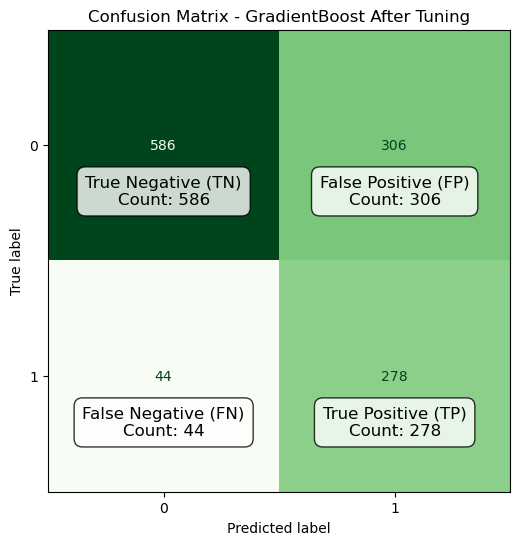

In [147]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Hitung confusion matrix
cm_tuned = confusion_matrix(y_test, y_test_pred)

# Buat visualisasi
fig, ax = plt.subplots(figsize=(8, 6))
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned)
disp_tuned.plot(cmap='Greens', ax=ax, colorbar=False)

# Label deskriptif
labels = np.array([["True Negative (TN)", "False Positive (FP)"],
                   ["False Negative (FN)", "True Positive (TP)"]])

for i in range(cm_tuned.shape[0]):
    for j in range(cm_tuned.shape[1]):
        text = f"{labels[i, j]}\nCount: {cm_tuned[i, j]}"
        ax.text(j, i + 0.2, text,
                ha="center", va="center",
                color="black", fontsize=12,
                bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.title('Confusion Matrix - GradientBoost After Tuning')
plt.grid(False)
plt.show()


Insight:

- Recall kelas churn tinggi → hanya 44 churn yang terlewat dari total 322 (sekitar 86.3% recall).

- Trade-off precision vs recall: jumlah FP yang cukup tinggi (306) menurunkan precision, namun wajar karena F2-score lebih memprioritaskan recall.

- F2 Score (CV): 0.73998 → sejalan dengan hasil confusion matrix, menunjukkan keseimbangan optimal antara meminimalkan churn yang terlewat dan menjaga performa prediksi secara umum.

##### E.3.4 Learning Curve Analysis

Learning curve analysis dilakukan untuk mengevaluasi performa dan stabilitas model seiring bertambahnya jumlah data pelatihan. Dengan membandingkan skor akurasi atau metrik lainnya pada data training dan validasi terhadap ukuran data, analisis ini membantu mengidentifikasi apakah model mengalami overfitting (terlalu kompleks) atau underfitting (terlalu sederhana). Selain itu, learning curve juga memberikan gambaran apakah penambahan data pelatihan akan berdampak signifikan terhadap peningkatan kinerja model, sehingga berguna dalam pengambilan keputusan terkait pengumpulan data atau penyempurnaan model.

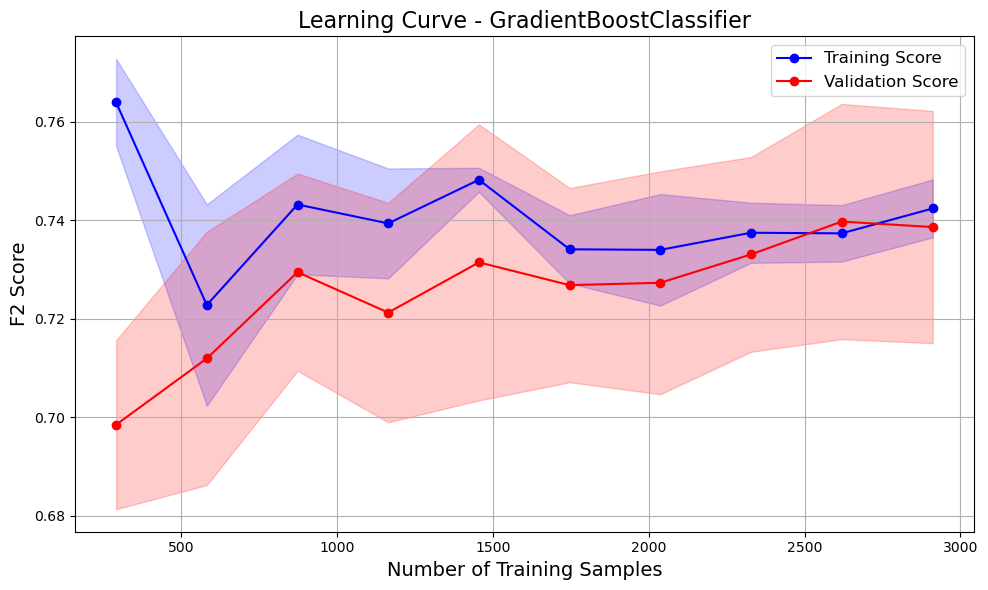

In [148]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# 1. Hitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1
)

# 2. Hitung rata-rata dan standar deviasi
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# 3. Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, test_mean, marker='o', color='red', label='Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')

plt.title('Learning Curve - GradientBoostClassifier', fontsize=16)
plt.xlabel('Number of Training Samples', fontsize=14)
plt.ylabel('F2 Score', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


INSIGHT:

Dari grafik learning curve di atas, terlihat bahwa selisih antara F2 score pada data training dan validation secara konsisten semakin mengecil seiring bertambahnya jumlah data pelatihan. Hal ini menunjukkan bahwa model GradientBoostClassifier berhasil mencapai keseimbangan antara bias dan varians, serta mampu menggeneralisasi dengan baik terhadap data baru. Baik kurva training maupun validation menunjukkan tren stabil di kisaran F2 score 0.73–0.75, tanpa indikasi menurun drastis, yang menandakan tidak terjadi overfitting. Selain itu, bentuk kurva yang mulai mendekati titik konvergen di akhir menunjukkan bahwa model telah memperoleh informasi yang cukup dari data, dan penambahan data lebih lanjut kemungkinan hanya akan memberikan peningkatan yang marginal. Ini mengindikasikan bahwa model sudah optimal untuk dataset saat ini dan siap digunakan untuk prediksi di dunia nyata.

##### E.3.5 ROC AUC Analysis

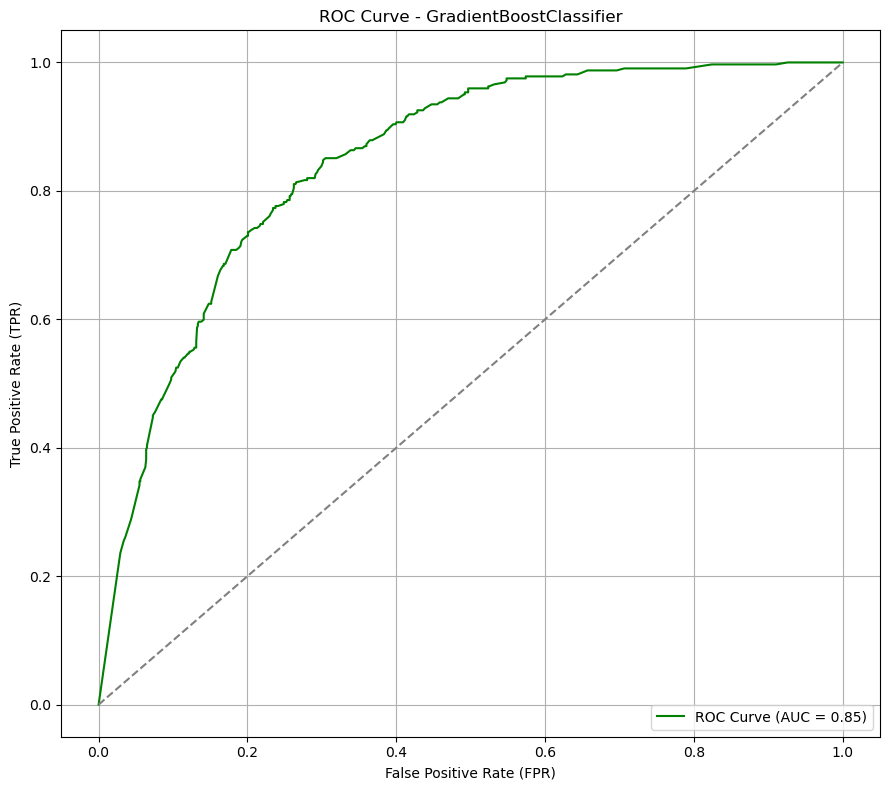

In [149]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Prediksi probabilitas kelas positif
y_proba_test = best_model.predict_proba(X_test)[:, 1]

# 2. Hitung nilai FPR, TPR dan AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
auc_score = roc_auc_score(y_test, y_proba_test)

# 3. Visualisasi ROC Curve
plt.figure(figsize=(9, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Garis referensi
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - GradientBoostClassifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


INSIGHT:

Hasil ROC Curve untuk model GradientBoostClassifier menunjukkan nilai AUC sebesar 0.85, yang mengindikasikan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara pelanggan churn dan non-churn. Kurva yang menjauh dari garis diagonal menunjukkan bahwa model menghasilkan prediksi probabilitas yang efektif, dengan trade-off antara true positive rate dan false positive rate yang stabil di berbagai threshold. Nilai ini juga mendukung bahwa model layak digunakan dalam skenario bisnis yang memprioritaskan deteksi churn secara akurat.

#### E.5 Threshold Optimization

Optimasi threshold dilakukan setelah model selesai dilatih, dengan tujuan untuk menyesuaikan batas probabilitas klasifikasi agar sesuai dengan kebutuhan bisnis atau metrik evaluasi tertentu, seperti F2 Score, recall, atau precision. Proses ini memungkinkan model memberikan prediksi kelas yang lebih selaras dengan tujuan spesifik, misalnya meminimalkan churn yang tidak terdeteksi.

In [150]:
from sklearn.metrics import precision_recall_curve, fbeta_score
import numpy as np

# 1. Hitung probabilitas prediksi untuk kelas positif
y_train_proba = best_model.predict_proba(X_train)[:, 1]
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# 2. Dapatkan precision, recall, dan threshold dari kurva precision-recall
prec, rec, thresh = precision_recall_curve(y_train, y_train_proba)

# 3. Hitung F2 Score untuk setiap threshold
f2_scores = [fbeta_score(y_train, (y_train_proba >= t).astype(int), beta=2) for t in thresh]

# 4. Ambil threshold terbaik dengan F2 Score tertinggi
best_idx = np.argmax(f2_scores)
best_threshold = thresh[best_idx]
best_f2_score = f2_scores[best_idx]

# 5. Cetak hasil
print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F2 Score (Train): {best_f2_score:.4f}")


Best Threshold: 0.3237
Best F2 Score (Train): 0.7455


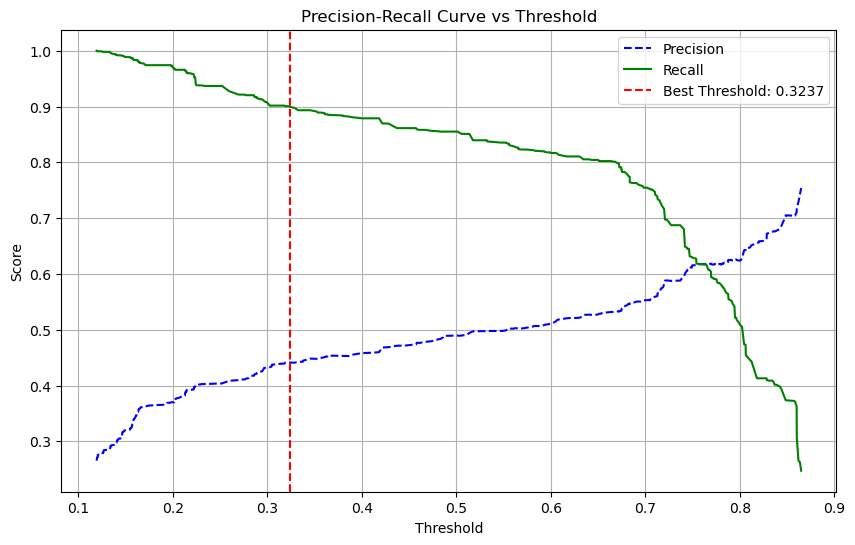

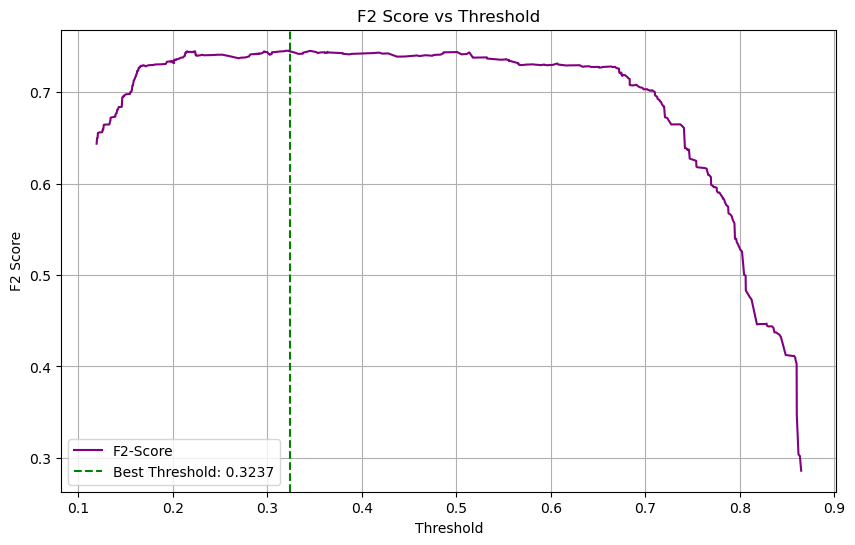

In [152]:
precision, recall, thresholds = precision_recall_curve(y_train, y_train_proba)

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')

plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.4f}')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve vs Threshold')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(thresholds, f2_scores, label='F2-Score', color='purple')
plt.axvline(x=best_threshold, color='green', linestyle='--', label=f'Best Threshold: {best_threshold:.4f}')

plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.title('F2 Score vs Threshold')
plt.legend(loc='best')
plt.grid()
plt.show()

INSIGHT:

Dua grafik ini secara konsisten menunjukkan bahwa threshold 0.3237 adalah titik terbaik untuk prediksi churn berbasis model GradientBoost, terutama ketika recall lebih diprioritaskan seperti dalam kasus deteksi churn pelanggan. Model pada titik ini tidak hanya lebih sensitif terhadap churn, tapi juga menjaga ketepatan klasifikasinya secara seimbang.

##### E.5.1 Performa dari optimasi Threshold pada data test dan train

In [154]:
best_threshold = 0.3237

y_train_pred_best = (y_train_proba >= best_threshold).astype(int)
train_report_best = classification_report(y_train, y_train_pred_best, output_dict=True)
print("Classification Report - Train Set with Best Threshold")
display(pd.DataFrame(train_report_best).transpose())

y_test_pred_best = (y_test_proba >= best_threshold).astype(int)
test_report_best = classification_report(y_test, y_test_pred_best, output_dict=True)
print("Classification Report - Test Set with Best Threshold")
display(pd.DataFrame(test_report_best).transpose())

print("F2 Score (Train):", fbeta_score(y_train, y_train_pred_best, beta=2))

print("F2 Score (Test):", fbeta_score(y_test, y_test_pred_best, beta=2))

Classification Report - Train Set with Best Threshold


,precision,recall,f1-score,support
0,0.941881,0.588103,0.724090,2673.000000
1,0.441117,0.899586,0.591962,966.000000
accuracy,0.670789,0.670789,0.670789,0.670789
macro avg,0.691499,0.743845,0.658026,3639.000000
weighted avg,0.808950,0.670789,0.689016,3639.000000


Classification Report - Test Set with Best Threshold


,precision,recall,f1-score,support
0,0.952381,0.582960,0.723227,892.000000
1,0.443114,0.919255,0.597980,322.000000
accuracy,0.672158,0.672158,0.672158,0.672158
macro avg,0.697747,0.751107,0.660603,1214.000000
weighted avg,0.817303,0.672158,0.690006,1214.000000


F2 Score (Train): 0.7447720260541653
F2 Score (Test): 0.7566462167689162


INSIGHT:

- Model menunjukkan kinerja optimal dalam mendeteksi churn dengan recall tinggi (~92%) dan F2 Score terbaik (~0.76) pada data test.

- Performanya konsisten antara data pelatihan dan pengujian, yang berarti model tidak overfit.

- Precision relatif rendah adalah trade-off yang diterima dalam konteks menghindari churn terlewat (false negative).

- Threshold 0.3237 adalah titik terbaik berdasarkan metrik F2, sangat cocok untuk kasus bisnis di mana menghindari kehilangan pelanggan lebih penting daripada salah menandai pelanggan loyal.

##### E.5.2 Confusion Matrix Best Threshold for F2 Score

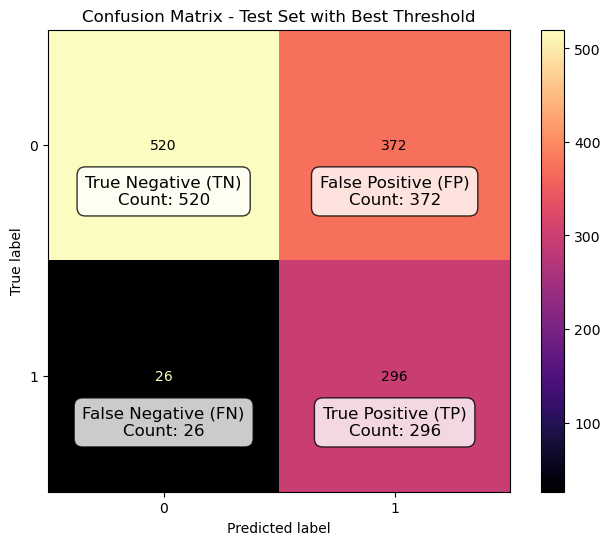

In [155]:
cm_test_best = confusion_matrix(y_test, y_test_pred_best)

fig, ax = plt.subplots(figsize=(8, 6))
disp_test_best = ConfusionMatrixDisplay(confusion_matrix=cm_test_best)
disp_test_best.plot(cmap='magma', ax=ax)

labels = np.array([["True Negative (TN)", "False Positive (FP)"],
                   ["False Negative (FN)", "True Positive (TP)"]])

for i in range(cm_test_best.shape[0]):
    for j in range(cm_test_best.shape[1]):
        text = f"{labels[i, j]}\nCount: {cm_test_best[i, j]}"
        ax.text(j, i + 0.2, text, ha="center", va="center", color="black", fontsize=12, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.title('Confusion Matrix - Test Set with Best Threshold')
plt.show()

INSIGHT:

- True Positives (TP): Model berhasil mendeteksi 296 pelanggan yang benar-benar churn.

- False Negatives (FN): Hanya 26 pelanggan churn yang terlewat, artinya model memiliki recall yang sangat tinggi (≈ 92%) — sangat penting dalam kasus churn.

- False Positives (FP): Sebanyak 372 pelanggan non-churn salah diklasifikasikan sebagai churn. Ini adalah trade-off karena threshold diturunkan untuk meningkatkan recall.

- True Negatives (TN): Model tetap mampu mengenali 520 pelanggan yang benar-benar tidak churn.

Optimasi threshold pada F2 score yang memberikan pemberatan lebih pada recall membantu model lebih baik dalam mendeteksi kelas positif dan mengurangi kesalahan false negative.

##### E.5.3 Pipeline Best Model

In [156]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Month-to-month',
                                                                              'One '
                                                                              'year',
                                                                              'Two '
                                                                              'year'],
                                                                             ['New',
                                                                              'Medium',
                                                                              'Long']]),
                                                  ['Contract', 'tenure_group']),
                                                 ('num', RobustScaler(),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure'])])),
                ('resampler', SMOTEENN(random_state=99)),
                ('feature_selection', 'passthrough'),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=150,
                                            random_state=99))])

### F. Feature Important

#### F.1 Feature Important

C:\Users\Tapik\AppData\Local\Temp\ipykernel_18472\3310605027.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances_df, y='Feature', x='Importance', palette='viridis')


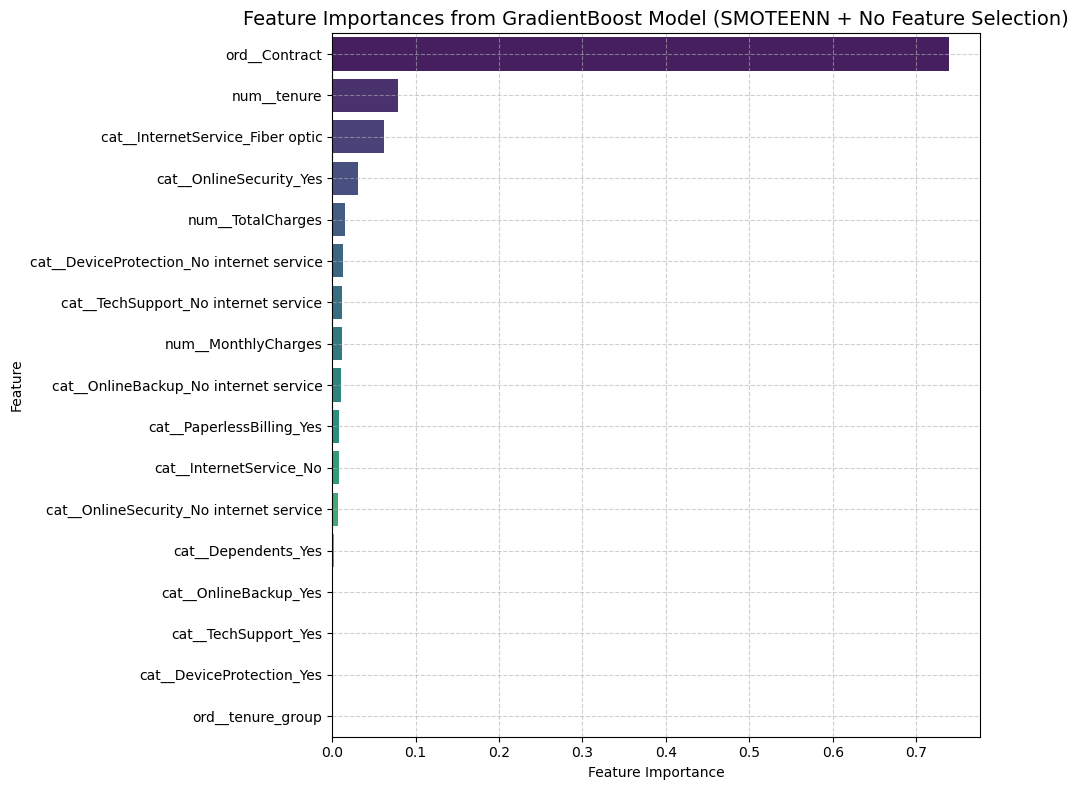

In [157]:
# Ambil preprocessor dan nama fitur setelah transformasi
preprocessor = best_model.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out(input_features=X_train.columns)

# Ambil nilai feature importances dari model classifier
importances = best_model.named_steps['classifier'].feature_importances_

# Buat DataFrame untuk visualisasi
feature_importances_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
)

# Visualisasikan feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances_df, y='Feature', x='Importance', palette='viridis')
plt.title('Feature Importances from GradientBoost Model (SMOTEENN + No Feature Selection)', fontsize=14)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


✅ Kesimpulan:

- Kontrak dan masa langganan adalah dua fitur paling dominan dalam memprediksi churn.

- Beberapa fitur layanan tambahan masih relevan, tapi kontribusinya jauh lebih kecil.

- Visualisasi menunjukkan bahwa fokus strategi retensi bisa diarahkan ke pelanggan kontrak bulanan dan ber-tenure rendah.

#### F.2 Feature Important (Korelasi Feature dan Label)

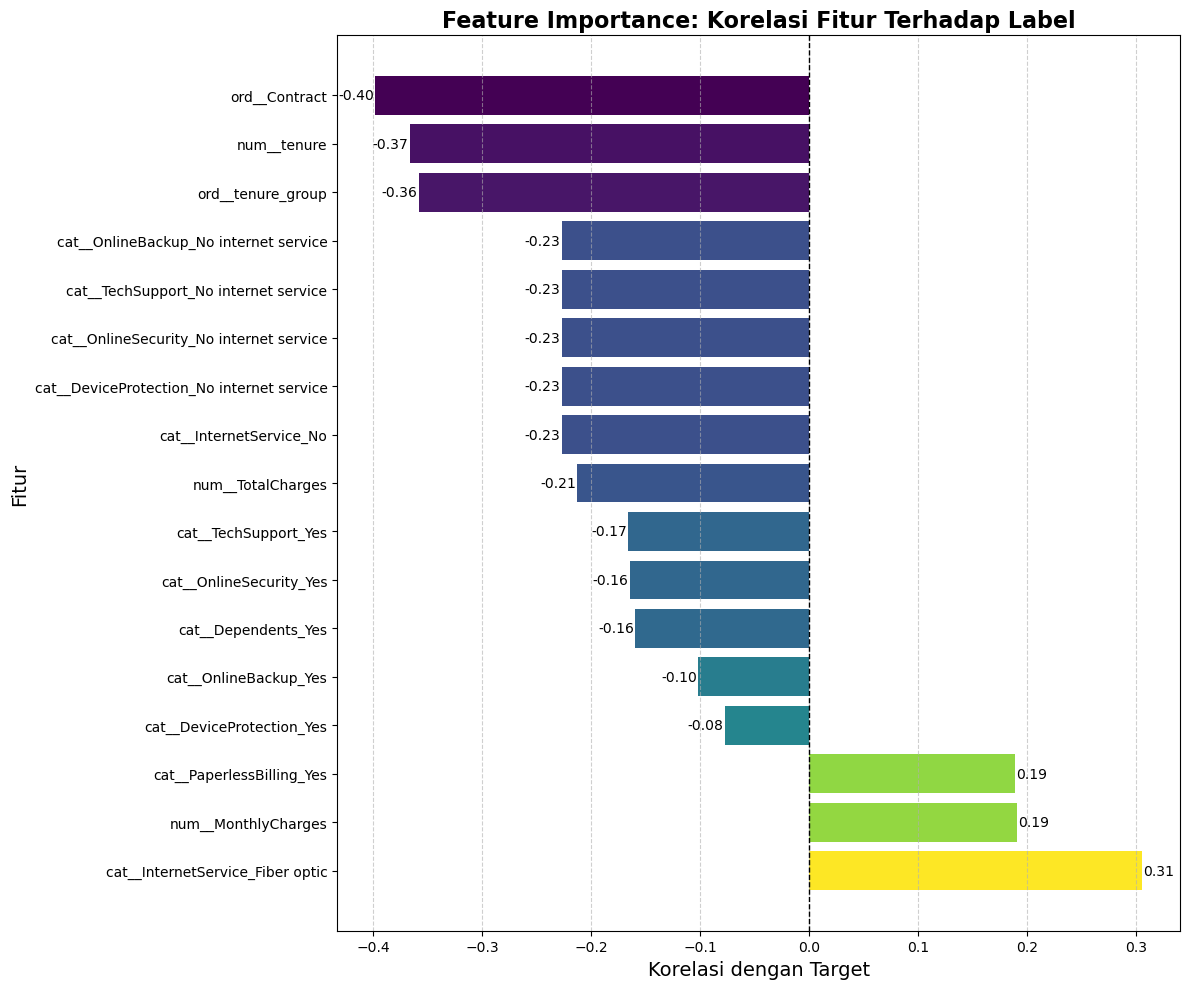

In [159]:
# Ambil fitur dari hasil preprocessing
preprocessor = best_model.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out(input_features=X_train.columns)

# Ambil fitur yang digunakan dalam model
X_encoded = pd.DataFrame(preprocessor.transform(X_train), columns=feature_names)

# Hitung korelasi setiap fitur dengan target
correlations = [X_encoded[col].corr(y_train) for col in X_encoded.columns]

# Buat DataFrame hasil korelasi
result = pd.DataFrame({
    "feature importance": X_encoded.columns,
    "correlation": correlations
}).sort_values("correlation", ascending=False)

# Visualisasi korelasi terhadap target
plt.figure(figsize=(12, 10))
plt.title("Feature Importance: Korelasi Fitur Terhadap Label", fontsize=16, fontweight='bold')

# Warna dinamis berdasarkan magnitude korelasi
cmap = plt.cm.viridis
normalize = plt.Normalize(result['correlation'].min(), result['correlation'].max())
colors = cmap(normalize(result['correlation'].values))

# Buat bar horizontal
plt.barh(result["feature importance"], result["correlation"], color=colors)
plt.axvline(0, color='black', linewidth=1, linestyle='--')

# Tambahkan label nilai korelasi pada bar
for i, value in enumerate(result["correlation"]):
    offset = 0.001 if value > 0 else -0.001
    plt.text(value + offset, i, f"{value:.2f}",
             ha="left" if value > 0 else "right",
             va="center", fontsize=10, color="black")

plt.xlabel("Korelasi dengan Target", fontsize=14)
plt.ylabel("Fitur", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


INSIGHT:

- Fitur dengan korelasi negatif (seperti ord__Contract, num__tenure) menandakan bahwa semakin tinggi nilainya, semakin kecil kemungkinan terjadi churn.

- Fitur dengan korelasi positif (seperti cat__InternetService_Fiber optic, num__MonthlyCharges) berasosiasi dengan peningkatan kemungkinan churn.

- Korelasi tertinggi:

    📉 ord__Contract memiliki korelasi paling negatif (-0.40): pelanggan dengan kontrak lebih panjang cenderung tidak churn.

    📈 cat__InternetService_Fiber optic memiliki korelasi positif paling tinggi (0.31): pengguna fiber optic lebih cenderung churn.

#### F.2 SHAP

SHAP Summary Plot - Training Data:


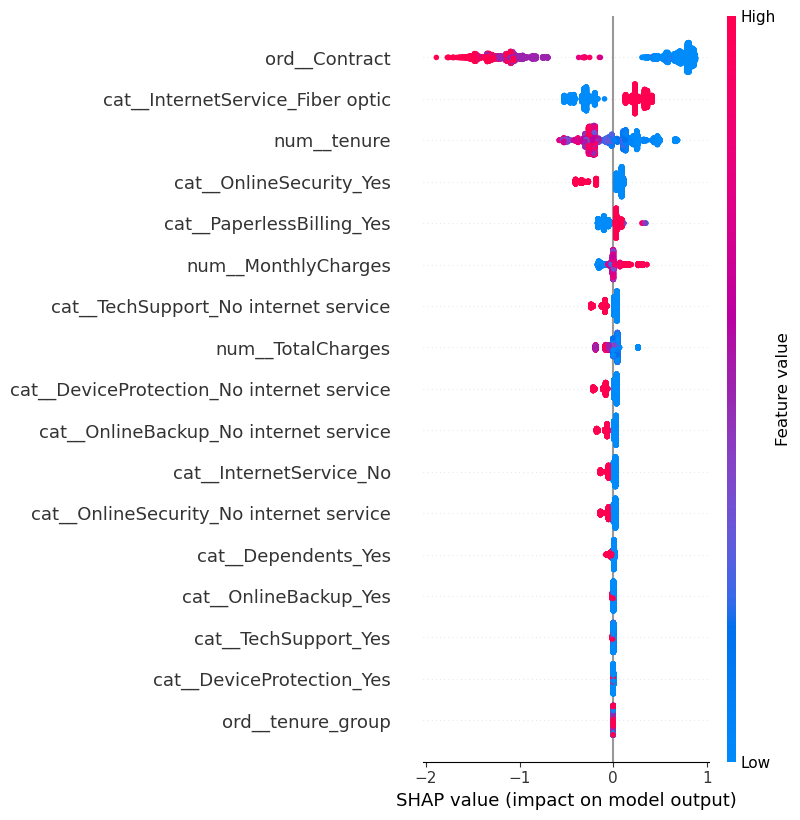

In [164]:
import shap
import matplotlib.pyplot as plt

# Transformasi fitur menggunakan preprocessor dari pipeline
X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)

# Resampling dengan SMOTEENN
X_train_resampled, y_train_resampled = best_model.named_steps['resampler'].fit_resample(X_train_transformed, y_train)

# Ambil nama-nama fitur setelah preprocessing
feature_names_after_preprocessing = best_model.named_steps['preprocessor'].get_feature_names_out()

# Buat SHAP explainer langsung dari model classifier
explainer = shap.Explainer(best_model.named_steps['classifier'], X_train_resampled)

# Hitung SHAP values
shap_values = explainer(X_train_resampled, check_additivity=False)

# Plot summary
print("SHAP Summary Plot - Training Data:")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values.values, X_train_resampled, feature_names=feature_names_after_preprocessing)
plt.show()


🔍 Insight
- ord__Contract memiliki pengaruh terbesar terhadap output model. Nilai rendah (kontrak pendek) mendorong prediksi ke arah churn.

- cat__InternetService_Fiber optic: penggunaan fiber optic juga mendorong kecenderungan churn jika disertai dengan kondisi tertentu.

- num__tenure: nilai kecil (pelanggan baru) memberi kontribusi besar terhadap churn.

- Fitur seperti cat__OnlineSecurity_Yes, cat__PaperlessBilling_Yes, dan MonthlyCharges juga memberikan pengaruh cukup signifikan.

- Beberapa fitur dengan nilai SHAP kecil namun stabil tetap memberikan kontribusi terhadap generalisasi model.

### G. Model Constraint

#### G.1 Feature Constraint

| **Fitur**                          | **Jenis Batasan**                      | **Alasan / Penjelasan**                                                                       |
| ---------------------------------- | -------------------------------------- | --------------------------------------------------------------------------------------------- |
| `ord__Contract`                    | 🔒 **Prioritas Tinggi** & **Fairness** | Fitur ini sangat penting (SHAP & importance tinggi), tapi tetap harus adil antar tipe kontrak |
| `num__tenure`                      | 🔒 **Threshold Awareness**             | Digunakan untuk membuat segmentasi (tenure group); perlu batasan karena pengguna baru vs lama |
| `ord__tenure_group`                | ⚖️ **Fair Grouping**                   | Harus diuji apakah distribusi churn adil antar grup umur pelanggan                            |
| `cat__InternetService_Fiber optic` | 🚩 **Potensi Bias Teknologis**         | Harus diuji apakah jenis layanan (fiber optic) mempengaruhi prediksi terlalu agresif          |
| `cat__OnlineSecurity_Yes/No`       | ⚠️ **Batasan Etika**                   | Harus dijaga agar tidak memberi kesan pelanggan tanpa layanan keamanan akan churn pasti       |
| `num__MonthlyCharges`              | 💡 **Sensitivitas Tinggi**             | Tidak boleh dijadikan satu-satunya dasar keputusan karena dapat bias terhadap kemampuan bayar |
| `cat__PaperlessBilling_Yes`        | 🔍 **Behavioral Bias Alert**           | Hindari menyimpulkan bahwa metode pembayaran otomatis langsung berarti risiko churn           |


#### G.2 Business Constraints

| **Aspek**                        | **Batasan/Kendala**                                                                       | **Penjelasan / Alasan Bisnis**                                                       |
| -------------------------------- | ----------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------ |
| 🎯 **Target Bisnis**             | Model harus **mengoptimalkan F2 Score**, bukan hanya akurasi                              | Karena cost kehilangan pelanggan (FN) lebih tinggi daripada salah mengira churn (FP) |
| 💰 **Biaya Retensi**             | Intervensi hanya dilakukan pada pelanggan **dengan probabilitas churn ≥ threshold**       | Agar strategi retensi tidak membuang anggaran ke pelanggan yang tidak akan churn     |
| 📈 **Skalabilitas**              | Model harus dapat **dilatih ulang secara efisien** saat data bertambah                    | Untuk memastikan model tetap responsif saat skala bisnis meningkat                   |
| 🧑‍💼 **Pengambilan Aksi**       | Output model harus **dapat ditindaklanjuti secara langsung oleh tim CRM / Sales**         | Probabilitas churn & segmen penting untuk mendesain promo atau pendekatan personal   |
| 🔍 **Keterbatasan Interpretasi** | Model harus **mudah dijelaskan** ke manajemen dan tim non-teknis                          | Keputusan berbasis model harus dapat dipahami untuk justifikasi bisnis               |
| 🔒 **Privasi dan Etika**         | Data sensitif seperti `Gender`, `PaymentMethod`, atau `OnlineSecurity` harus **ditinjau** | Untuk menghindari risiko bias dan pelanggaran etika bisnis                           |
| 🕒 **Durasi Latih Model**        | Pelatihan model tidak boleh melebihi **waktu eksekusi tertentu** (misal 5-10 menit)       | Untuk mendukung proses CI/CD atau retraining periodik secara praktis                 |
| 📉 **False Negative Rendah**     | Model harus meminimalkan pelanggan yang sebenarnya churn tetapi tidak terdeteksi          | Pelanggan yang hilang sulit didapat kembali → kerugian langsung terhadap pendapatan  |


## 3. RECOMMENDATION

✅ Kesimpulan Model

Model prediksi churn yang dibangun menggunakan **GradientBoostingClassifier** dengan penyeimbangan data melalui **SMOTEENN** serta **optimasi threshold F2 Score** menunjukkan performa yang solid dan stabil:

- **F2 Score (Train):** 0.745  
- **F2 Score (Test):** 0.756  
- Model menunjukkan generalisasi yang baik dan **tidak overfitting**, terlihat dari kesetaraan performa antara data train dan test.
- **Threshold optimal (0.3237)** berhasil meningkatkan kemampuan model dalam mendeteksi pelanggan yang akan churn.
- Analisis fitur menggunakan **feature importance dan SHAP** mengungkap fitur-fitur yang paling berpengaruh dalam memprediksi churn.
- Durasi pelatihan model masih dalam batas yang wajar, memastikan model dapat di-*scale up* pada data yang lebih besar.

---



💼 Rekomendasi Bisnis

🎯 1. Fokus pada Segmentasi Pelanggan Berisiko Tinggi
Gunakan hasil scoring churn untuk membuat segmen pelanggan dengan probabilitas churn tinggi dan berikan:
- Loyalty program atau diskon khusus
- Intervensi proaktif dari tim customer service
- Penawaran produk dengan nilai tambah

📊 2. Manfaatkan Fitur Penting untuk Strategi Retensi
Fitur dominan seperti `Contract`, `Tenure`, dan `MonthlyCharges` dapat dijadikan indikator utama dalam:
- Penyusunan strategi onboarding pelanggan baru
- Menentukan prioritas dalam retensi pelanggan eksisting

⏱ 3. Implementasi Threshold Optimal
Gunakan threshold hasil tuning (0.3237) untuk operasional scoring harian. Ini akan meningkatkan recall untuk churn tanpa banyak mengorbankan precision.

🔁 4. Pelatihan Ulang Model Secara Berkala
Lakukan retraining model setiap **3–6 bulan sekali** agar akurasi tetap terjaga, seiring berubahnya perilaku dan pola pelanggan.

🔍 5. Monitoring & Interpretasi Model
Integrasikan analisis interpretabilitas model (seperti SHAP) ke dalam dashboard analitik agar tim manajemen dan marketing dapat:
- Memahami alasan prediksi churn
- Membuat keputusan berbasis data yang lebih akurat dan cepat


## 4. DEPLOYMENT

In [165]:
import pickle

X_final = pd.concat([X_train, X_test], axis=0)
y_final = pd.concat([y_train, y_test], axis=0)

best_model.fit(X_final, y_final)

model_filename = 'Telco_Churn_Prediction_Model_GradientBoostCLassifier.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Month-to-month',
                                                                              'One '
                                                                              'year',
                                                                              'Two '
                                                                              'year'],
                                                                             ['New',
                                                                              'Medium',
                                                                              'Long']]),
                                                  ['Contract', 'tenure_group']),
                                                 ('num', RobustScaler(),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure'])])),
                ('resampler', SMOTEENN(random_state=99)),
                ('feature_selection', 'passthrough'),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=150,
                                            random_state=99))])

Terima Kasih